In [1]:
#本代碼所涉及的所有函數庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Dropout,LSTM
from keras import backend
from keras.optimizers import SGD
from pandas import read_csv
import tensorflow.keras
import tensorflow as tf
import csv
import math
import random
import operator
from scipy.ndimage import gaussian_filter1d
from scipy.signal import medfilt
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.layers.wrappers import Bidirectional
from keras.layers.normalization import BatchNormalization
from keras.layers.recurrent import GRU
%matplotlib inline
import os
import keras

# LSTM模型

In [2]:
def res(arr,x,y):
    zeroarray=np.zeros((1,y))
    #print(arr.shape)
    k=120-x+1
    if x<=120:
        for i in range(1,k):
            arr = np.vstack((arr,zeroarray))      #重設矩陣大小
    return arr

In [3]:
def classdatapredeal(dirdata1,dirdata2,string):
    
#     df = pd.read_csv(filedir1)#
#     #print(df)
#     attribute=df.columns#獲取屬性值
    attribute_set=[]
    count_arribute=0#基因選擇後的屬性個數
    #print(attribute)
    i=0
    for record in string: 
        if (record=='0'):
            count_arribute+=1
            attribute_set.append(i)
        i=1+i
    print(count_arribute)
    
    data1 = []
    label1 = []
    data2 = []
    label2 = []
    
    for i in os.listdir(dirdata1):
        npy_file = (dirdata1+i)
        x=np.load(npy_file)
        
        #x=np.delete(x, [30,31,32,33,34,35,36,37,40,41,42,43,46,47,48,49], axis=1)
        x=np.delete(x,attribute_set , axis=1)
        a,b=x.shape
        x=x.flatten('F')
        x.resize(120*b)
        x = np.array(x)
        
        
        data1.append(x)
        label1.append(0)
    print(len(data1))

    for i in os.listdir(dirdata2):
        npy_file = (dirdata2+i)
        x=np.load(npy_file)
        #x=np.delete(x, [30,31,32,33,34,35,36,37,40,41,42,43,46,47,48,49], axis=1)
        x=np.delete(x,attribute_set , axis=1)
        a,b=x.shape
        
        x=x.flatten('F')
        
        x.resize(120*b)
        x = np.array(x)
        
        data2.append(x)
        label2.append(1)
    print(len(data2))
    
    # print(data1)
    data1 = np.array(data1)
    label1 = np.array(label1)
    print(data1)
    data2 = np.array(data2)
    label2 = np.array(label2)
    
    
    print(label1.shape)
    #print(label1)
    
    data1 = preprocessing.scale(data1)
    data2 = preprocessing.scale(data2)
   
    #print(data1)
    print(data1.shape)
#     data1=medfilt(data1,3)
#     data1=gaussian_filter1d(data1,1.2)
#     data2=medfilt(data2,3)
#     data2=gaussian_filter1d(data2,1.2)
#     sc=MinMaxScaler(feature_range=(0,1))
#     data1=sc.fit_transform(data1)
#     data2=sc.fit_transform(data2)
    return  data1,label1,data2,label2

In [4]:
def datasplit(data,label):
    train_X,test_X, train_y, test_y = train_test_split(data,
                                                   label,
                                                   test_size = 0.4,
                                                   random_state = 77,shuffle=True)
    return train_X,test_X, train_y, test_y
    

In [5]:
def datasplit1(data,label):
    train_X,test_X, train_y, test_y = train_test_split(data,
                                                   label,
                                                   test_size = 0.5,
                                                   random_state = 42,shuffle=True)
    return train_X,test_X, train_y, test_y
    

In [6]:
#分類數據重組
def classdataReorganization(data1,label1,data2,label2,step):
    re_train_data = []
    re_train_label=[]
    
    data1 = np.array(data1)
    data2 = np.array(data2)
    
    for i in range(0,data1.shape[0]):
        re_train_data.append(data1[i])
        re_train_label.append(label1[0])

    for i in range(0,data2.shape[0]):
        re_train_data.append(data2[i])
        re_train_label.append(label2[0])
    
    
    All_data = np.array(re_train_data)
    All_label = np.array(re_train_label)
    #print(All_data[0])
     # Label Onehot-encoding 
    All_label = np_utils.to_categorical(All_label)
    #print(All_data.shape[2])
    #print(All_label.shape)
    #print(All_label)
    return All_data,All_label

In [7]:
#分類數據重組
def classdataReorganization1(data1,label1,data2,label2,step):
    re_train_data = []
    re_train_label=[]
    #print(data1.shape)
    #print(label1)
    for i in range(len(data1)-step):
        re_train_data.append(data1[i:i+step])
        re_train_label.append(label1[i+step])

    for i in range(len(data2)-step):
        re_train_data.append(data2[i:i+step])
        re_train_label.append(label2[i+step])
    
    
    All_data = np.array(re_train_data)
    All_label = np.array(re_train_label)
    #print(All_data.shape)
     # Label Onehot-encoding 
    All_label = np_utils.to_categorical(All_label)
    return All_data,All_label

In [8]:
#分類數據重組
def classdataReorganization2(data1,label1,data2,label2,step):
    re_train_data = []
    re_train_label=[]
    
    data1 = np.array(data1)
    data2 = np.array(data2)
    #print(data1.shape)
    #print(label1)
    
    for i in range(0,data1.shape[0]):
        re_train_data.append(data1[i])
        re_train_label.append(label1[i])

    for i in range(0,data2.shape[0]):
        re_train_data.append(data2[i])
        re_train_label.append(label2[i])
    
    
    All_data = np.array(re_train_data)
    All_label = np.array(re_train_label)
    #print(All_data.shape)
    #print(All_data[0])
     # Label Onehot-encoding 
    All_label = np_utils.to_categorical(All_label)
    return All_data,All_label

In [9]:
def timeModel(X,step):
# 序列到序列堆叠式LSTM模型 
    #temp=X.shape[2]
    model=Sequential()
    model.add(LSTM(20,activation='relu',input_shape=(step,X.shape[2]),return_sequences=True))
    model.add(LSTM(20,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2,activation = 'sigmoid'))
    model.compile(loss='mse', optimizer="Adam", metrics=['accuracy'])
    model.summary()
    return model

In [10]:
def timeModel1(X,step):
# 序列到序列堆叠式LSTM模型 

    model=Sequential()
    model.add(LSTM(20,activation='relu',input_shape=(step,X.shape[2]),return_sequences=True))
    model.add(LSTM(20,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2,activation = 'sigmoid'))
    model.compile(loss='mse', optimizer="Adam", metrics=['accuracy'])
    model.summary()
    return model

# 基因演算法

In [11]:
class GA():
    def __init__(self, length, count):
        # 染色體長度
        self.length = length
        # 種群中的染色體數量
        self.count = count
        # 隨機生成初始種群
        self.population = self.gen_population(length, count)
        for i in range(len(self.population)):
            print("染色體：")
            print(i)
            print (self.population[i])
            print ('{0:b}'.format(self.population[i]))
#         #數據文路徑
#         self.filedir=filedir
    def evolve(self, retain_rate=0.2, random_select_rate=0.5, mutation_rate=0.01):
        """
        進化
        對當前一代種群依次進行選擇、交叉並生成新一代種群，然後對新一代種群進行變異
        """
        parents = self.selection(retain_rate, random_select_rate)
        self.crossover(parents)
        self.mutation(mutation_rate)
    def gen_chromosome(self, length):
        """
        隨機生成長度為length的染色體，每個基因的取值是0或1
        這裡用一個bit表示一個基因
        """
        chromosome = 0
        for i in range(length):
            # 這裡的或是整個二進位制比對的或|,比如10和1或下來的結果是11，  1001和101或的結果是1101，所以此處是個不斷隨機或出來的長度
            chromosome |= (1 << i) * random.randint(0, 1)  # 這裡每次左移， 隨機生成一個0或者1的數字，這樣不斷左移生成給定長度的二進位制染色體

        #print ('{0:b}'.format(chromosome))
        print("gen_chromosome pass")
        return chromosome
    def gen_population(self, length, count):
        """
        獲取初始種群（一個含有count個長度為length的染色體的列表）
        """
        po=[]
        j=0
        while j<=count:#保证染色体长度一致
            chromosome=0
            for i in range(length):
                    # 這裡的或是整個二進位制比對的或|,比如10和1或下來的結果是11，  1001和101或的結果是1101，所以此處是個不斷隨機或出來的長度
                    chromosome |= (1 << i) * random.randint(0, 1) 
                    #print('{0:b}'.format(chromosome))
            string='{0:b}'.format(chromosome)
            len_chromosome=len(string)
            if len_chromosome==length:
                po.append(chromosome)
                j+=1

            
        print("gen_population pass")
        return po
    def fitness(self, chromosome):
            string='{0:b}'.format(chromosome)
            print("所選擇的染色體：")
            print(string)
            #檔案路徑
            class_dirdata1='正手訓/'
            class_dirdata2='反手訓/'
            #特征篩選
            class_data1,class_label1,class_data2,class_label2=classdatapredeal(class_dirdata1,class_dirdata2,string)
            time_step=100#時間序列設置
            #數據和標籤設定
            class_All_data,class_All_label=classdataReorganization1(class_data1,class_label1,class_data2,class_label2,time_step)
            #訓練集測試集分割
            train_X,test_X, train_y, test_y=datasplit(class_All_data,class_All_label)
            
            print(train_X.shape)
            
            #print(train_X)
            
            #print(train_X[0][0])
            
            #print(train_X[0][0].shape)
            
            #模型訓練
            timemodel=timeModel1(train_X,time_step)
            history = timemodel.fit(train_X,train_y,epochs=50, validation_split=0.2,batch_size=50, verbose=1)
            score = timemodel.evaluate(test_X, test_y, verbose=0)
            
            print(score[1])
            print("fitness pass")
            return score[1]
    def selection(self, retain_rate, random_select_rate):
        """
        選擇
        先對適應度從大到小排序，選出存活的染色體
        再進行隨機選擇，選出適應度雖然小，但是倖存下來的個體
        """
        # 對適應度從大到小進行排序
        graded = [(self.fitness(chromosome), chromosome) for chromosome in self.population]  # 求出所有染色體的適應值列表
        
        print(graded)
        graded = [x[1] for x in sorted(graded, reverse=True)]  # 從小到大排序，形成新列表
        # 選出適應性強的染色體
        retain_length = int(len(graded) * retain_rate)  # 根據比例值  找到前。個適應性強的染色體 作為下一代的父母親
        parents = graded[:retain_length]
        print(parents)
        # 選出適應性不強，但是倖存的染色體        從後面中  隨機選取一比例   也放到父母親中
        for chromosome in graded[retain_length:]:
            if random.random() < random_select_rate:
                parents.append(chromosome)
        print(parents)
        print("selection pass")
        return parents
    def crossover(self, parents):
        """
        染色體的交叉、繁殖，生成新一代的種群
        """
        # 新出生的孩子，最終會被加入存活下來的父母之中，形成新一代的種群。
        children = []
        # 需要繁殖的孩子的量，差值，就是要交叉生成的目標數
        target_count = len(self.population) - len(parents)
        print("target_count:")
        print(target_count)
        # 開始根據需要的量進行繁殖
        while len(children) < target_count:
            male = random.randint(0, len(parents) - 1)
            female = random.randint(0, len(parents) - 1)
            if male != female:  # 父母親序號不能相同
                # 隨機選取交叉點
                cross_pos = random.randint(0, self.length)
                # 生成掩碼，方便位操作
                mask = 0
                for i in range(cross_pos):
                    mask |= (1 << i)
                male = parents[male]
                female = parents[female]
                # 孩子將獲得父親在交叉點前的基因和母親在交叉點後（包括交叉點）的基因
                child = ((male & mask) | (female & ~mask)) & ((1 << self.length) - 1)
                children.append(child)
        # 經過繁殖後，孩子和父母的數量與原始種群數量相等，在這裡可以更新種群。
        self.population = parents + children
        for i in range(len(self.population)):
            print("生成新一代的種群")
            print("染色體：")
            print(i)
            print (self.population[i])
            print ('{0:b}'.format(self.population[i]))
        print("crossover pass")
    def mutation(self, rate):
        """
        變異
        對種群中的所有個體，隨機改變某個個體中的某個基因
        """
        for i in range(len(self.population)):
            if random.random() < rate:
                j = random.randint(0, self.length - 1)
                self.population[i] ^= 1 << j
        for i in range(len(self.population)):
            print("變異後的種群")
            print("染色體：")
            print(i)
            print (self.population[i])
            print ('{0:b}'.format(self.population[i]))
        print("mutation pass")
    def decode(self, chromosome):
            """
            解碼染色體，將二進位制轉化為屬於[0, 9]的實數
            """
            print("decode pass")
            return chromosome * 9.0 / (2 ** self.length - 1)
            
    def result(self):
        """
        獲得當前代的最優值，這裡取的是函式取最大值時x的值。
        """
#         print (self.population[i])
#         print ('{0:b}'.format(self.population[i]))
        print("result pass")
        return '{0:b}'.format(self.population[0])

# 合併演算法

In [12]:
if __name__ == '__main__':
    # 染色體長度為76， 種群數量為20
    #26列
    count=0#计算当下迭代次数
    ga = GA(50,10)
    # 10次進化迭代
    for x in range(10):
        print("迭代次數：",x)
        print(x)
        ga.evolve()
   

gen_population pass
染色體：
0
923441258232480
11010001111101110101101100001010101111101010100000
染色體：
1
775310821526625
10110000010010010000011110000110111000110001100001
染色體：
2
921963755448778
11010001101000010101101010001000111010100111001010
染色體：
3
957257731078682
11011001101001111011101111000001001111101000011010
染色體：
4
1061734365432041
11110001011010010001001011101100101000100011101001
染色體：
5
675987511003229
10011001101100111010011011011101110100100001011101
染色體：
6
1019307627305479
11100111110000111000001101000010101101101000000111
染色體：
7
785501562696613
10110010100110100011010101100111010111001110100101
染色體：
8
714840212662246
10100010100010010010110100111100100110011111100110
染色體：
9
961137397134474
11011010100010011000111101001000101111010010001010
染色體：
10
1110258296291920
11111100011100011000100111010111000000001001010000
迭代次數： 0
0
所選擇的染色體：
11010001111101110101101100001010101111101010100000
23
240
200
[[842.31366 842.25574 842.2272  ...   0.        0.        0.     ]
 [786.4423  78

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 20)           260880    
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
dense (Dense)                (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 161ms/step - loss: 0.2903 - accuracy: 0.5304 - val_loss: 0.2750 - val_accuracy: 0.7586
Epoch 2/80
3/3 [==============================] - 0s 80ms/step - loss: 0.2860 - accuracy: 0.6087 - val_loss

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 2400)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 20)           193680    
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 42        
Total params: 197,082
Trainable params: 197,042
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 144ms/step - loss: 0.3189 - accuracy: 0.4870 - val_loss: 0.2258 - val_accuracy: 0.7586
Epoch 2/80
3/3 [==============================] - 0s 68ms/step - loss: 0.2454 - accuracy

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 20)           222480    
_________________________________________________________________
lstm_5 (LSTM)                (None, 20)                3280      
_________________________________________________________________
batch_normalization_2 (Batch (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total params: 225,882
Trainable params: 225,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 188ms/step - loss: 0.2777 - accuracy: 0.5478 - val_loss: 0.5091 - val_accuracy: 0.4483
Epoch 2/80
3/3 [==============================] - 0s 76ms/step - loss: 0.3159 - accuracy: 0.4609 - val_lo

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3360)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 20)           270480    
_________________________________________________________________
lstm_7 (LSTM)                (None, 20)                3280      
_________________________________________________________________
batch_normalization_3 (Batch (None, 20)                80        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 181ms/step - loss: 0.2989 - accuracy: 0.4609 - val_loss: 0.3159 - val_accuracy: 0.6552
Epoch 2/80
3/3 [==============================] - 0s 107ms/step - loss: 0.2419 - accurac

Epoch 53/80
3/3 [==============================] - 0s 103ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 54/80
3/3 [==============================] - 0s 102ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 55/80
3/3 [==============================] - 0s 104ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 56/80
3/3 [==============================] - 0s 100ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 57/80
3/3 [==============================] - 0s 107ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 58/80
3/3 [==============================] - 0s 103ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 59/80
3/3 [==============================] - 0s 107ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 20)           232080    
_________________________________________________________________
lstm_9 (LSTM)                (None, 20)                3280      
_________________________________________________________________
batch_normalization_4 (Batch (None, 20)                80        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 147ms/step - loss: 0.2570 - accuracy: 0.5391 - val_loss: 0.3385 - val_accuracy: 0.6552
Epoch 2/80
3/3 [==============================] - 0s 73ms/step - loss: 0.2331 - accuracy: 0.6087 - val_lo

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 100, 20)           270480    
_________________________________________________________________
lstm_11 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_5 (Batch (None, 20)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 171ms/step - loss: 0.2749 - accuracy: 0.6261 - val_loss: 0.4004 - val_accuracy: 0.7586
Epoch 2/80
3/3 [==============================] - 0s 97ms/step - loss: 0.2544 - accuracy: 0.6435 - val_lo

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 2880)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 20)           232080    
_________________________________________________________________
lstm_13 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_6 (Batch (None, 20)                80        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 152ms/step - loss: 0.2446 - accuracy: 0.6261 - val_loss: 0.1961 - val_accuracy: 0.6897
Epoch 2/80
3/3 [==============================] - 0s 77ms/step - loss: 0.1750 - accuracy

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 100, 20)           260880    
_________________________________________________________________
lstm_15 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_7 (Batch (None, 20)                80        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 157ms/step - loss: 0.2585 - accuracy: 0.6087 - val_loss: 0.5294 - val_accuracy: 0.4138
Epoch 2/80
3/3 [==============================] - 0s 80ms/step - loss: 0.2656 - accuracy: 0.4870 - val_lo

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 100, 20)           241680    
_________________________________________________________________
lstm_17 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_8 (Batch (None, 20)                80        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 42        
Total params: 245,082
Trainable params: 245,042
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 150ms/step - loss: 0.3062 - accuracy: 0.5478 - val_loss: 0.2234 - val_accuracy: 0.6897
Epoch 2/80
3/3 [==============================] - 0s 76ms/step - loss: 0.2614 - accuracy: 0.6174 - val_lo

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 100, 20)           232080    
_________________________________________________________________
lstm_19 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_9 (Batch (None, 20)                80        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 147ms/step - loss: 0.2617 - accuracy: 0.6087 - val_loss: 0.4192 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 73ms/step - loss: 0.1982 - accuracy: 0.7304 - val_lo

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 100, 20)           212880    
_________________________________________________________________
lstm_21 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_10 (Batc (None, 20)                80        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 42        
Total params: 216,282
Trainable params: 216,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 147ms/step - loss: 0.1919 - accuracy: 0.8348 - val_loss: 0.2048 - val_accuracy: 0.9310
Epoch 2/80
3/3 [==============================] - 0s 70ms/step - loss: 0.1546 - accuracy: 0.8870 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3360)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 100, 20)           270480    
_________________________________________________________________
lstm_23 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_11 (Batc (None, 20)                80        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 173ms/step - loss: 0.3009 - accuracy: 0.4174 - val_loss: 0.3549 - val_accuracy: 0.6552
Epoch 2/80
3/3 [==============================] - 0s 105ms/step - loss: 0.2460 - accura

Epoch 53/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2899 - accuracy: 0.5826 - val_loss: 0.2919 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2891 - accuracy: 0.5739 - val_loss: 0.2922 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 107ms/step - loss: 0.2782 - accuracy: 0.5478 - val_loss: 0.2924 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2757 - accuracy: 0.5826 - val_loss: 0.2925 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 108ms/step - loss: 0.2648 - accuracy: 0.5739 - val_loss: 0.2925 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2679 - accuracy: 0.6000 - val_loss: 0.2926 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2634 - accuracy: 0.5739 - val_loss: 0.2926 - val_accuracy: 0.4138
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 100, 20)           222480    
_________________________________________________________________
lstm_25 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_12 (Batc (None, 20)                80        
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 42        
Total params: 225,882
Trainable params: 225,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 148ms/step - loss: 0.2691 - accuracy: 0.5739 - val_loss: 0.1726 - val_accuracy: 0.7241
Epoch 2/80
3/3 [==============================] - 0s 72ms/step - loss: 0.2140 - accuracy: 0.7043 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 100, 20)           241680    
_________________________________________________________________
lstm_27 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_13 (Batc (None, 20)                80        
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 42        
Total params: 245,082
Trainable params: 245,042
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 150ms/step - loss: 0.2447 - accuracy: 0.6957 - val_loss: 0.4708 - val_accuracy: 0.3448
Epoch 2/80
3/3 [==============================] - 0s 85ms/step - loss: 0.3098 - accuracy: 0.4087 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 100, 20)           232080    
_________________________________________________________________
lstm_29 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_14 (Batc (None, 20)                80        
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 155ms/step - loss: 0.3834 - accuracy: 0.2696 - val_loss: 0.6327 - val_accuracy: 0.3103
Epoch 2/80
3/3 [==============================] - 0s 82ms/step - loss: 0.3415 - accuracy: 0.4261 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 100, 20)           270480    
_________________________________________________________________
lstm_31 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_15 (Batc (None, 20)                80        
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 181ms/step - loss: 0.2516 - accuracy: 0.6522 - val_loss: 0.2887 - val_accuracy: 0.5517
Epoch 2/80
3/3 [==============================] - 0s 104ms/step - loss: 0.2811 - accuracy: 0.5478 - val_

Epoch 53/80
3/3 [==============================] - 0s 97ms/step - loss: 0.0893 - accuracy: 0.9565 - val_loss: 0.1330 - val_accuracy: 0.8966
Epoch 54/80
3/3 [==============================] - 0s 104ms/step - loss: 0.0874 - accuracy: 0.9565 - val_loss: 0.1309 - val_accuracy: 0.8966
Epoch 55/80
3/3 [==============================] - 0s 100ms/step - loss: 0.0857 - accuracy: 0.9739 - val_loss: 0.1290 - val_accuracy: 0.8966
Epoch 56/80
3/3 [==============================] - 0s 103ms/step - loss: 0.0851 - accuracy: 0.9652 - val_loss: 0.1273 - val_accuracy: 0.8966
Epoch 57/80
3/3 [==============================] - 0s 104ms/step - loss: 0.0834 - accuracy: 0.9565 - val_loss: 0.1282 - val_accuracy: 0.8966
Epoch 58/80
3/3 [==============================] - 0s 99ms/step - loss: 0.0837 - accuracy: 0.9565 - val_loss: 0.1264 - val_accuracy: 0.8966
Epoch 59/80
3/3 [==============================] - 0s 101ms/step - loss: 0.0806 - accuracy: 0.9565 - val_loss: 0.1247 - val_accuracy: 0.8966
Epoch 60/80
3/3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3240)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 100, 20)           260880    
_________________________________________________________________
lstm_33 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_16 (Batc (None, 20)                80        
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 156ms/step - loss: 0.2878 - accuracy: 0.4696 - val_loss: 0.3887 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 87ms/step - loss: 0.2715 - accurac

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 100, 20)           232080    
_________________________________________________________________
lstm_35 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_17 (Batc (None, 20)                80        
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 153ms/step - loss: 0.2324 - accuracy: 0.6870 - val_loss: 0.2948 - val_accuracy: 0.6552
Epoch 2/80
3/3 [==============================] - 0s 79ms/step - loss: 0.3264 - accuracy: 0.4174 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 100, 20)           270480    
_________________________________________________________________
lstm_37 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_18 (Batc (None, 20)                80        
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 177ms/step - loss: 0.2729 - accuracy: 0.5217 - val_loss: 0.4356 - val_accuracy: 0.2759
Epoch 2/80
3/3 [==============================] - 0s 100ms/step - loss: 0.3126 - accuracy: 0.4174 - val_

Epoch 53/80
3/3 [==============================] - 0s 100ms/step - loss: 0.2223 - accuracy: 0.6609 - val_loss: 0.1839 - val_accuracy: 0.7586
Epoch 54/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2143 - accuracy: 0.6435 - val_loss: 0.1828 - val_accuracy: 0.7586
Epoch 55/80
3/3 [==============================] - 0s 100ms/step - loss: 0.2123 - accuracy: 0.6870 - val_loss: 0.1807 - val_accuracy: 0.7586
Epoch 56/80
3/3 [==============================] - 0s 105ms/step - loss: 0.1961 - accuracy: 0.7739 - val_loss: 0.1775 - val_accuracy: 0.7931
Epoch 57/80
3/3 [==============================] - 0s 99ms/step - loss: 0.1962 - accuracy: 0.7652 - val_loss: 0.1703 - val_accuracy: 0.7931
Epoch 58/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2113 - accuracy: 0.7565 - val_loss: 0.1670 - val_accuracy: 0.8276
Epoch 59/80
3/3 [==============================] - 0s 97ms/step - loss: 0.2049 - accuracy: 0.7130 - val_loss: 0.1680 - val_accuracy: 0.7931
Epoch 60/80
3/3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3000)
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 100, 20)           241680    
_________________________________________________________________
lstm_39 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_19 (Batc (None, 20)                80        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 42        
Total params: 245,082
Trainable params: 245,042
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 154ms/step - loss: 0.2508 - accuracy: 0.6609 - val_loss: 0.3353 - val_accuracy: 0.5517
Epoch 2/80
3/3 [==============================] - 0s 85ms/step - loss: 0.3399 - accurac

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 100, 20)           232080    
_________________________________________________________________
lstm_41 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_20 (Batc (None, 20)                80        
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 153ms/step - loss: 0.2868 - accuracy: 0.4435 - val_loss: 0.3757 - val_accuracy: 0.4483
Epoch 2/80
3/3 [==============================] - 0s 86ms/step - loss: 0.2967 - accuracy: 0.5130 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 100, 20)           232080    
_________________________________________________________________
lstm_43 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_21 (Batc (None, 20)                80        
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 154ms/step - loss: 0.2273 - accuracy: 0.6261 - val_loss: 0.4721 - val_accuracy: 0.5862
Epoch 2/80
3/3 [==============================] - 0s 82ms/step - loss: 0.2622 - accuracy: 0.6000 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3360)
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 100, 20)           270480    
_________________________________________________________________
lstm_45 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_22 (Batc (None, 20)                80        
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 175ms/step - loss: 0.2226 - accuracy: 0.7652 - val_loss: 0.2759 - val_accuracy: 0.6552
Epoch 2/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2562 - accura

Epoch 53/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2192 - accuracy: 0.7304 - val_loss: 0.1757 - val_accuracy: 0.7586
Epoch 54/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2029 - accuracy: 0.7826 - val_loss: 0.1997 - val_accuracy: 0.6552
Epoch 55/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2133 - accuracy: 0.7652 - val_loss: 0.1981 - val_accuracy: 0.6552
Epoch 56/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2015 - accuracy: 0.7913 - val_loss: 0.2060 - val_accuracy: 0.6207
Epoch 57/80
3/3 [==============================] - 0s 98ms/step - loss: 0.2152 - accuracy: 0.7565 - val_loss: 0.2362 - val_accuracy: 0.5862
Epoch 58/80
3/3 [==============================] - 0s 100ms/step - loss: 0.2205 - accuracy: 0.7130 - val_loss: 0.2429 - val_accuracy: 0.5517
Epoch 59/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2047 - accuracy: 0.8348 - val_loss: 0.2315 - val_accuracy: 0.6207
Epoch 60/80
3/

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3360)
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 100, 20)           270480    
_________________________________________________________________
lstm_47 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_23 (Batc (None, 20)                80        
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 174ms/step - loss: 0.2901 - accuracy: 0.5565 - val_loss: 0.2843 - val_accuracy: 0.6207
Epoch 2/80
3/3 [==============================] - 0s 106ms/step - loss: 0.1249 - accura

Epoch 53/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2768 - accuracy: 0.5565 - val_loss: 0.2656 - val_accuracy: 0.4828
Epoch 54/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2565 - accuracy: 0.5913 - val_loss: 0.2472 - val_accuracy: 0.5172
Epoch 55/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2631 - accuracy: 0.5826 - val_loss: 0.2505 - val_accuracy: 0.5517
Epoch 56/80
3/3 [==============================] - 0s 104ms/step - loss: 0.2632 - accuracy: 0.5391 - val_loss: 0.2535 - val_accuracy: 0.5172
Epoch 57/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2423 - accuracy: 0.6261 - val_loss: 0.2577 - val_accuracy: 0.5172
Epoch 58/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2435 - accuracy: 0.6261 - val_loss: 0.2380 - val_accuracy: 0.5172
Epoch 59/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2694 - accuracy: 0.6087 - val_loss: 0.2560 - val_accuracy: 0.4828
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 100, 20)           222480    
_________________________________________________________________
lstm_49 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_24 (Batc (None, 20)                80        
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 42        
Total params: 225,882
Trainable params: 225,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 155ms/step - loss: 0.2564 - accuracy: 0.7043 - val_loss: 0.3114 - val_accuracy: 0.5862
Epoch 2/80
3/3 [==============================] - 0s 85ms/step - loss: 0.2666 - accuracy: 0.5913 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3240)
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 100, 20)           260880    
_________________________________________________________________
lstm_51 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_25 (Batc (None, 20)                80        
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 162ms/step - loss: 0.2461 - accuracy: 0.6348 - val_loss: 0.1795 - val_accuracy: 0.8966
Epoch 2/80
3/3 [==============================] - 0s 91ms/step - loss: 0.1994 - accurac

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3120)
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 100, 20)           251280    
_________________________________________________________________
lstm_53 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_26 (Batc (None, 20)                80        
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 42        
Total params: 254,682
Trainable params: 254,642
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 164ms/step - loss: 0.3048 - accuracy: 0.4609 - val_loss: 0.5472 - val_accuracy: 0.4138
Epoch 2/80
3/3 [==============================] - 0s 88ms/step - loss: 0.2603 - accurac

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 100, 20)           260880    
_________________________________________________________________
lstm_55 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_27 (Batc (None, 20)                80        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 163ms/step - loss: 0.2369 - accuracy: 0.6522 - val_loss: 0.1466 - val_accuracy: 0.6207
Epoch 2/80
3/3 [==============================] - 0s 86ms/step - loss: 0.1617 - accuracy: 0.8696 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 100, 20)           222480    
_________________________________________________________________
lstm_57 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_28 (Batc (None, 20)                80        
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 42        
Total params: 225,882
Trainable params: 225,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 153ms/step - loss: 0.1835 - accuracy: 0.8000 - val_loss: 0.2716 - val_accuracy: 0.6207
Epoch 2/80
3/3 [==============================] - 0s 80ms/step - loss: 0.2082 - accuracy: 0.7565 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_58 (LSTM)               (None, 100, 20)           270480    
_________________________________________________________________
lstm_59 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_29 (Batc (None, 20)                80        
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 175ms/step - loss: 0.2933 - accuracy: 0.5130 - val_loss: 0.4238 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 108ms/step - loss: 0.2795 - accuracy: 0.6087 - val_

Epoch 53/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2178 - accuracy: 0.7391 - val_loss: 0.2010 - val_accuracy: 0.6207
Epoch 54/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2059 - accuracy: 0.7652 - val_loss: 0.1989 - val_accuracy: 0.6552
Epoch 55/80
3/3 [==============================] - 0s 104ms/step - loss: 0.2030 - accuracy: 0.7478 - val_loss: 0.2124 - val_accuracy: 0.6552
Epoch 56/80
3/3 [==============================] - 0s 107ms/step - loss: 0.2005 - accuracy: 0.7913 - val_loss: 0.2377 - val_accuracy: 0.6552
Epoch 57/80
3/3 [==============================] - 0s 108ms/step - loss: 0.1753 - accuracy: 0.7826 - val_loss: 0.2068 - val_accuracy: 0.6552
Epoch 58/80
3/3 [==============================] - 0s 107ms/step - loss: 0.2028 - accuracy: 0.7826 - val_loss: 0.2041 - val_accuracy: 0.6552
Epoch 59/80
3/3 [==============================] - 0s 109ms/step - loss: 0.2067 - accuracy: 0.7304 - val_loss: 0.2170 - val_accuracy: 0.6207
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3240)
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 100, 20)           260880    
_________________________________________________________________
lstm_61 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_30 (Batc (None, 20)                80        
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 164ms/step - loss: 0.3299 - accuracy: 0.3478 - val_loss: 0.3963 - val_accuracy: 0.5172
Epoch 2/80
3/3 [==============================] - 0s 93ms/step - loss: 0.2879 - accurac

3/3 [==============================] - 0s 98ms/step - loss: 0.2136 - accuracy: 0.7304 - val_loss: 0.2526 - val_accuracy: 0.4483
Epoch 54/80
3/3 [==============================] - 0s 93ms/step - loss: 0.2264 - accuracy: 0.7130 - val_loss: 0.2474 - val_accuracy: 0.4483
Epoch 55/80
3/3 [==============================] - 0s 97ms/step - loss: 0.2453 - accuracy: 0.6957 - val_loss: 0.2811 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 98ms/step - loss: 0.2554 - accuracy: 0.6522 - val_loss: 0.2840 - val_accuracy: 0.3793
Epoch 57/80
3/3 [==============================] - 0s 97ms/step - loss: 0.2675 - accuracy: 0.5478 - val_loss: 0.3030 - val_accuracy: 0.3793
Epoch 58/80
3/3 [==============================] - 0s 95ms/step - loss: 0.2687 - accuracy: 0.6000 - val_loss: 0.3150 - val_accuracy: 0.3793
Epoch 59/80
3/3 [==============================] - 0s 91ms/step - loss: 0.2908 - accuracy: 0.5913 - val_loss: 0.3101 - val_accuracy: 0.3793
Epoch 60/80
3/3 [===============

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_62 (LSTM)               (None, 100, 20)           232080    
_________________________________________________________________
lstm_63 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_31 (Batc (None, 20)                80        
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 155ms/step - loss: 0.2785 - accuracy: 0.5739 - val_loss: 0.2981 - val_accuracy: 0.7241
Epoch 2/80
3/3 [==============================] - 0s 82ms/step - loss: 0.2900 - accuracy: 0.5826 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, 100, 20)           280080    
_________________________________________________________________
lstm_65 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_32 (Batc (None, 20)                80        
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 188ms/step - loss: 0.2323 - accuracy: 0.7739 - val_loss: 0.2130 - val_accuracy: 0.6897
Epoch 2/80
3/3 [==============================] - 0s 114ms/step - loss: 0.2419 - accura

Epoch 53/80
3/3 [==============================] - 0s 108ms/step - loss: 0.1466 - accuracy: 0.9304 - val_loss: 0.1788 - val_accuracy: 0.7241
Epoch 54/80
3/3 [==============================] - 0s 108ms/step - loss: 0.1374 - accuracy: 0.9565 - val_loss: 0.1779 - val_accuracy: 0.7241
Epoch 55/80
3/3 [==============================] - 0s 110ms/step - loss: 0.1373 - accuracy: 0.9391 - val_loss: 0.1767 - val_accuracy: 0.7241
Epoch 56/80
3/3 [==============================] - 0s 111ms/step - loss: 0.1424 - accuracy: 0.9130 - val_loss: 0.1796 - val_accuracy: 0.6897
Epoch 57/80
3/3 [==============================] - 0s 111ms/step - loss: 0.1371 - accuracy: 0.9391 - val_loss: 0.1706 - val_accuracy: 0.7241
Epoch 58/80
3/3 [==============================] - 0s 112ms/step - loss: 0.1351 - accuracy: 0.9565 - val_loss: 0.1705 - val_accuracy: 0.7241
Epoch 59/80
3/3 [==============================] - 0s 107ms/step - loss: 0.1262 - accuracy: 0.9565 - val_loss: 0.1786 - val_accuracy: 0.6552
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 2880)
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 100, 20)           232080    
_________________________________________________________________
lstm_67 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_33 (Batc (None, 20)                80        
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 164ms/step - loss: 0.2905 - accuracy: 0.5565 - val_loss: 0.4202 - val_accuracy: 0.4483
Epoch 2/80
3/3 [==============================] - 0s 92ms/step - loss: 0.2946 - accurac

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3240)
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_68 (LSTM)               (None, 100, 20)           260880    
_________________________________________________________________
lstm_69 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_34 (Batc (None, 20)                80        
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 166ms/step - loss: 0.2295 - accuracy: 0.6696 - val_loss: 0.3964 - val_accuracy: 0.6552
Epoch 2/80
3/3 [==============================] - 0s 99ms/step - loss: 0.2451 - accurac

Epoch 53/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2054 - accuracy: 0.7739 - val_loss: 0.3195 - val_accuracy: 0.4483
Epoch 54/80
3/3 [==============================] - 0s 97ms/step - loss: 0.2473 - accuracy: 0.6348 - val_loss: 0.2615 - val_accuracy: 0.4483
Epoch 55/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2643 - accuracy: 0.5304 - val_loss: 0.2652 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 93ms/step - loss: 0.2769 - accuracy: 0.4783 - val_loss: 0.3877 - val_accuracy: 0.3793
Epoch 57/80
3/3 [==============================] - 0s 95ms/step - loss: 0.3051 - accuracy: 0.4957 - val_loss: 0.3255 - val_accuracy: 0.3793
Epoch 58/80
3/3 [==============================] - 0s 96ms/step - loss: 0.3248 - accuracy: 0.4348 - val_loss: 0.2849 - val_accuracy: 0.3448
Epoch 59/80
3/3 [==============================] - 0s 97ms/step - loss: 0.3056 - accuracy: 0.4696 - val_loss: 0.2823 - val_accuracy: 0.3793
Epoch 60/80
3/3 [=

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_70 (LSTM)               (None, 100, 20)           260880    
_________________________________________________________________
lstm_71 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_35 (Batc (None, 20)                80        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 168ms/step - loss: 0.1874 - accuracy: 0.7739 - val_loss: 0.2166 - val_accuracy: 0.7931
Epoch 2/80
3/3 [==============================] - 0s 104ms/step - loss: 0.1527 - accuracy: 0.8435 - val_

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_72 (LSTM)               (None, 100, 20)           280080    
_________________________________________________________________
lstm_73 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_36 (Batc (None, 20)                80        
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 186ms/step - loss: 0.1995 - accuracy: 0.8609 - val_loss: 0.2872 - val_accuracy: 0.8621
Epoch 2/80
3/3 [==============================] - 0s 113ms/step - loss: 0.1586 - accura

Epoch 53/80
3/3 [==============================] - 0s 112ms/step - loss: 0.1331 - accuracy: 0.9304 - val_loss: 0.2684 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 113ms/step - loss: 0.1279 - accuracy: 0.9304 - val_loss: 0.2684 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 114ms/step - loss: 0.1243 - accuracy: 0.9217 - val_loss: 0.2683 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 113ms/step - loss: 0.1248 - accuracy: 0.9391 - val_loss: 0.2682 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 112ms/step - loss: 0.1197 - accuracy: 0.9304 - val_loss: 0.2681 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 109ms/step - loss: 0.1214 - accuracy: 0.9217 - val_loss: 0.2680 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 112ms/step - loss: 0.1158 - accuracy: 0.9478 - val_loss: 0.2679 - val_accuracy: 0.4138
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_74 (LSTM)               (None, 100, 20)           270480    
_________________________________________________________________
lstm_75 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_37 (Batc (None, 20)                80        
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 186ms/step - loss: 0.2421 - accuracy: 0.5913 - val_loss: 0.1450 - val_accuracy: 0.9310
Epoch 2/80
3/3 [==============================] - 0s 109ms/step - loss: 0.2069 - accuracy: 0.7739 - val_

Epoch 53/80
3/3 [==============================] - 0s 105ms/step - loss: 0.2521 - accuracy: 0.6174 - val_loss: 0.2379 - val_accuracy: 0.6552
Epoch 54/80
3/3 [==============================] - 0s 110ms/step - loss: 0.2494 - accuracy: 0.6348 - val_loss: 0.2321 - val_accuracy: 0.6552
Epoch 55/80
3/3 [==============================] - 0s 109ms/step - loss: 0.2313 - accuracy: 0.6348 - val_loss: 0.2236 - val_accuracy: 0.6552
Epoch 56/80
3/3 [==============================] - 0s 110ms/step - loss: 0.2200 - accuracy: 0.6957 - val_loss: 0.2359 - val_accuracy: 0.5517
Epoch 57/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2240 - accuracy: 0.6783 - val_loss: 0.2329 - val_accuracy: 0.5517
Epoch 58/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2208 - accuracy: 0.6783 - val_loss: 0.2288 - val_accuracy: 0.5517
Epoch 59/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2185 - accuracy: 0.6870 - val_loss: 0.2261 - val_accuracy: 0.6207
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3240)
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_76 (LSTM)               (None, 100, 20)           260880    
_________________________________________________________________
lstm_77 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_38 (Batc (None, 20)                80        
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 162ms/step - loss: 0.1880 - accuracy: 0.8348 - val_loss: 0.4300 - val_accuracy: 0.5862
Epoch 2/80
3/3 [==============================] - 0s 98ms/step - loss: 0.2792 - accurac

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3240)
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (None, 100, 20)           260880    
_________________________________________________________________
lstm_79 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_39 (Batc (None, 20)                80        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 163ms/step - loss: 0.2878 - accuracy: 0.4957 - val_loss: 0.2720 - val_accuracy: 0.7241
Epoch 2/80
3/3 [==============================] - 0s 93ms/step - loss: 0.3026 - accurac

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_80 (LSTM)               (None, 100, 20)           280080    
_________________________________________________________________
lstm_81 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_40 (Batc (None, 20)                80        
_________________________________________________________________
dense_40 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 184ms/step - loss: 0.2775 - accuracy: 0.5739 - val_loss: 0.2990 - val_accuracy: 0.3448
Epoch 2/80
3/3 [==============================] - 0s 113ms/step - loss: 0.3486 - accura

Epoch 53/80
3/3 [==============================] - 0s 114ms/step - loss: 0.2901 - accuracy: 0.5391 - val_loss: 0.3091 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 110ms/step - loss: 0.2897 - accuracy: 0.5217 - val_loss: 0.3131 - val_accuracy: 0.3793
Epoch 55/80
3/3 [==============================] - 0s 113ms/step - loss: 0.3068 - accuracy: 0.4696 - val_loss: 0.2910 - val_accuracy: 0.4483
Epoch 56/80
3/3 [==============================] - 0s 110ms/step - loss: 0.3007 - accuracy: 0.5304 - val_loss: 0.3426 - val_accuracy: 0.3793
Epoch 57/80
3/3 [==============================] - 0s 108ms/step - loss: 0.2943 - accuracy: 0.5130 - val_loss: 0.3139 - val_accuracy: 0.4483
Epoch 58/80
3/3 [==============================] - 0s 108ms/step - loss: 0.2869 - accuracy: 0.5652 - val_loss: 0.3059 - val_accuracy: 0.4483
Epoch 59/80
3/3 [==============================] - 0s 111ms/step - loss: 0.2795 - accuracy: 0.5565 - val_loss: 0.3177 - val_accuracy: 0.3793
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3360)
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_82 (LSTM)               (None, 100, 20)           270480    
_________________________________________________________________
lstm_83 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_41 (Batc (None, 20)                80        
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 187ms/step - loss: 0.3292 - accuracy: 0.3217 - val_loss: 0.4313 - val_accuracy: 0.2414
Epoch 2/80
3/3 [==============================] - 0s 113ms/step - loss: 0.2977 - accura

Epoch 53/80
3/3 [==============================] - 0s 107ms/step - loss: 0.2545 - accuracy: 0.5913 - val_loss: 0.2905 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 111ms/step - loss: 0.2622 - accuracy: 0.5652 - val_loss: 0.2893 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2737 - accuracy: 0.5913 - val_loss: 0.2870 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2679 - accuracy: 0.5652 - val_loss: 0.2903 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2716 - accuracy: 0.5478 - val_loss: 0.2893 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 108ms/step - loss: 0.2450 - accuracy: 0.6087 - val_loss: 0.2987 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 109ms/step - loss: 0.2527 - accuracy: 0.5739 - val_loss: 0.2971 - val_accuracy: 0.3793
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_84 (LSTM)               (None, 100, 20)           280080    
_________________________________________________________________
lstm_85 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_42 (Batc (None, 20)                80        
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 188ms/step - loss: 0.2336 - accuracy: 0.6522 - val_loss: 0.2834 - val_accuracy: 0.8621
Epoch 2/80
3/3 [==============================] - 0s 117ms/step - loss: 0.1471 - accuracy: 0.9217 - val_

Epoch 53/80
3/3 [==============================] - 0s 113ms/step - loss: 0.1374 - accuracy: 0.8609 - val_loss: 0.2017 - val_accuracy: 0.6897
Epoch 54/80
3/3 [==============================] - 0s 112ms/step - loss: 0.1399 - accuracy: 0.8609 - val_loss: 0.2003 - val_accuracy: 0.6897
Epoch 55/80
3/3 [==============================] - 0s 115ms/step - loss: 0.1342 - accuracy: 0.8609 - val_loss: 0.1990 - val_accuracy: 0.6897
Epoch 56/80
3/3 [==============================] - 0s 115ms/step - loss: 0.1355 - accuracy: 0.8435 - val_loss: 0.1983 - val_accuracy: 0.7241
Epoch 57/80
3/3 [==============================] - 0s 114ms/step - loss: 0.1365 - accuracy: 0.8609 - val_loss: 0.1967 - val_accuracy: 0.7586
Epoch 58/80
3/3 [==============================] - 0s 115ms/step - loss: 0.1264 - accuracy: 0.8696 - val_loss: 0.1954 - val_accuracy: 0.7586
Epoch 59/80
3/3 [==============================] - 0s 108ms/step - loss: 0.1245 - accuracy: 0.8957 - val_loss: 0.1942 - val_accuracy: 0.7586
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_86 (LSTM)               (None, 100, 20)           280080    
_________________________________________________________________
lstm_87 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_43 (Batc (None, 20)                80        
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 187ms/step - loss: 0.2653 - accuracy: 0.6522 - val_loss: 0.3431 - val_accuracy: 0.5517
Epoch 2/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2590 - accura

Epoch 53/80
3/3 [==============================] - 0s 116ms/step - loss: 0.1672 - accuracy: 0.9217 - val_loss: 0.1917 - val_accuracy: 0.7586
Epoch 54/80
3/3 [==============================] - 0s 119ms/step - loss: 0.1794 - accuracy: 0.9043 - val_loss: 0.1900 - val_accuracy: 0.7931
Epoch 55/80
3/3 [==============================] - 0s 115ms/step - loss: 0.1631 - accuracy: 0.9043 - val_loss: 0.1898 - val_accuracy: 0.7931
Epoch 56/80
3/3 [==============================] - 0s 121ms/step - loss: 0.1690 - accuracy: 0.9130 - val_loss: 0.2041 - val_accuracy: 0.7241
Epoch 57/80
3/3 [==============================] - 0s 119ms/step - loss: 0.1561 - accuracy: 0.9304 - val_loss: 0.1905 - val_accuracy: 0.7586
Epoch 58/80
3/3 [==============================] - 0s 122ms/step - loss: 0.1608 - accuracy: 0.9130 - val_loss: 0.2018 - val_accuracy: 0.7241
Epoch 59/80
3/3 [==============================] - 0s 119ms/step - loss: 0.1511 - accuracy: 0.9217 - val_loss: 0.1991 - val_accuracy: 0.7241
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_88 (LSTM)               (None, 100, 20)           280080    
_________________________________________________________________
lstm_89 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_44 (Batc (None, 20)                80        
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 190ms/step - loss: 0.2870 - accuracy: 0.5913 - val_loss: 0.5019 - val_accuracy: 0.4138
Epoch 2/80
3/3 [==============================] - 0s 118ms/step - loss: 0.2443 - accura

Epoch 53/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2378 - accuracy: 0.5652 - val_loss: 0.2740 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2346 - accuracy: 0.5739 - val_loss: 0.2744 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2309 - accuracy: 0.6000 - val_loss: 0.2745 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 116ms/step - loss: 0.2326 - accuracy: 0.5913 - val_loss: 0.2749 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2281 - accuracy: 0.6000 - val_loss: 0.2750 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2251 - accuracy: 0.6000 - val_loss: 0.2754 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2265 - accuracy: 0.6000 - val_loss: 0.2757 - val_accuracy: 0.4138
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 100, 20)           280080    
_________________________________________________________________
lstm_91 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_45 (Batc (None, 20)                80        
_________________________________________________________________
dense_45 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 191ms/step - loss: 0.2649 - accuracy: 0.5739 - val_loss: 0.3130 - val_accuracy: 0.7241
Epoch 2/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2919 - accura

Epoch 53/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2471 - accuracy: 0.6609 - val_loss: 0.2690 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 113ms/step - loss: 0.2324 - accuracy: 0.6261 - val_loss: 0.2735 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2498 - accuracy: 0.5826 - val_loss: 0.2765 - val_accuracy: 0.3793
Epoch 56/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2296 - accuracy: 0.6609 - val_loss: 0.2720 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2552 - accuracy: 0.6000 - val_loss: 0.2654 - val_accuracy: 0.4483
Epoch 58/80
3/3 [==============================] - 0s 117ms/step - loss: 0.2308 - accuracy: 0.6609 - val_loss: 0.2666 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2237 - accuracy: 0.7043 - val_loss: 0.2729 - val_accuracy: 0.3793
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 2880)
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_92 (LSTM)               (None, 100, 20)           232080    
_________________________________________________________________
lstm_93 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_46 (Batc (None, 20)                80        
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 162ms/step - loss: 0.3421 - accuracy: 0.3913 - val_loss: 0.4303 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 86ms/step - loss: 0.2761 - accurac

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3360)
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_94 (LSTM)               (None, 100, 20)           270480    
_________________________________________________________________
lstm_95 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_47 (Batc (None, 20)                80        
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 186ms/step - loss: 0.3864 - accuracy: 0.2348 - val_loss: 0.3884 - val_accuracy: 0.5862
Epoch 2/80
3/3 [==============================] - 0s 114ms/step - loss: 0.2717 - accura

Epoch 53/80
3/3 [==============================] - 0s 117ms/step - loss: 0.2575 - accuracy: 0.6870 - val_loss: 0.2902 - val_accuracy: 0.5862
Epoch 54/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2451 - accuracy: 0.6783 - val_loss: 0.2826 - val_accuracy: 0.6207
Epoch 55/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2463 - accuracy: 0.6783 - val_loss: 0.2584 - val_accuracy: 0.5862
Epoch 56/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2376 - accuracy: 0.6435 - val_loss: 0.2693 - val_accuracy: 0.5517
Epoch 57/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2301 - accuracy: 0.6696 - val_loss: 0.2904 - val_accuracy: 0.5172
Epoch 58/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2261 - accuracy: 0.6870 - val_loss: 0.2823 - val_accuracy: 0.5172
Epoch 59/80
3/3 [==============================] - 0s 116ms/step - loss: 0.2317 - accuracy: 0.6783 - val_loss: 0.2649 - val_accuracy: 0.5517
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_96 (LSTM)               (None, 100, 20)           260880    
_________________________________________________________________
lstm_97 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_48 (Batc (None, 20)                80        
_________________________________________________________________
dense_48 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 175ms/step - loss: 0.2511 - accuracy: 0.5826 - val_loss: 0.2724 - val_accuracy: 0.6207
Epoch 2/80
3/3 [==============================] - 0s 99ms/step - loss: 0.1752 - accuracy: 0.7478 - val_l

Epoch 53/80
3/3 [==============================] - 0s 98ms/step - loss: 0.1688 - accuracy: 0.8348 - val_loss: 0.2376 - val_accuracy: 0.6207
Epoch 54/80
3/3 [==============================] - 0s 98ms/step - loss: 0.1705 - accuracy: 0.7913 - val_loss: 0.2366 - val_accuracy: 0.6207
Epoch 55/80
3/3 [==============================] - 0s 99ms/step - loss: 0.1655 - accuracy: 0.8174 - val_loss: 0.2358 - val_accuracy: 0.6207
Epoch 56/80
3/3 [==============================] - 0s 104ms/step - loss: 0.1664 - accuracy: 0.8087 - val_loss: 0.2354 - val_accuracy: 0.6207
Epoch 57/80
3/3 [==============================] - 0s 101ms/step - loss: 0.1701 - accuracy: 0.8174 - val_loss: 0.2346 - val_accuracy: 0.6207
Epoch 58/80
3/3 [==============================] - 0s 104ms/step - loss: 0.1601 - accuracy: 0.8261 - val_loss: 0.2340 - val_accuracy: 0.6207
Epoch 59/80
3/3 [==============================] - 0s 101ms/step - loss: 0.1609 - accuracy: 0.8435 - val_loss: 0.2335 - val_accuracy: 0.6207
Epoch 60/80
3/3 

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_98 (LSTM)               (None, 100, 20)           260880    
_________________________________________________________________
lstm_99 (LSTM)               (None, 20)                3280      
_________________________________________________________________
batch_normalization_49 (Batc (None, 20)                80        
_________________________________________________________________
dense_49 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 169ms/step - loss: 0.2677 - accuracy: 0.5565 - val_loss: 0.3845 - val_accuracy: 0.5517
Epoch 2/80
3/3 [==============================] - 0s 99ms/step - loss: 0.3146 - accuracy: 0.3826 - val_l

Epoch 53/80
3/3 [==============================] - 0s 98ms/step - loss: 0.2046 - accuracy: 0.6870 - val_loss: 0.2681 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 101ms/step - loss: 0.1911 - accuracy: 0.6783 - val_loss: 0.2679 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 103ms/step - loss: 0.1911 - accuracy: 0.6696 - val_loss: 0.2676 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 103ms/step - loss: 0.1811 - accuracy: 0.7043 - val_loss: 0.2672 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 104ms/step - loss: 0.1771 - accuracy: 0.7217 - val_loss: 0.2668 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 103ms/step - loss: 0.1691 - accuracy: 0.7652 - val_loss: 0.2664 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 100ms/step - loss: 0.1589 - accuracy: 0.8174 - val_loss: 0.2660 - val_accuracy: 0.4138
Epoch 60/80
3/

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_100 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_101 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_50 (Batc (None, 20)                80        
_________________________________________________________________
dense_50 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 190ms/step - loss: 0.2725 - accuracy: 0.5043 - val_loss: 0.3688 - val_accuracy: 0.4483
Epoch 2/80
3/3 [==============================] - 0s 118ms/step - loss: 0.3358 - accura

Epoch 53/80
3/3 [==============================] - 0s 114ms/step - loss: 0.2872 - accuracy: 0.5826 - val_loss: 0.2945 - val_accuracy: 0.5517
Epoch 54/80
3/3 [==============================] - 0s 118ms/step - loss: 0.2817 - accuracy: 0.5391 - val_loss: 0.2925 - val_accuracy: 0.5517
Epoch 55/80
3/3 [==============================] - 0s 117ms/step - loss: 0.2784 - accuracy: 0.5739 - val_loss: 0.2907 - val_accuracy: 0.5517
Epoch 56/80
3/3 [==============================] - 0s 117ms/step - loss: 0.2897 - accuracy: 0.5130 - val_loss: 0.2880 - val_accuracy: 0.5517
Epoch 57/80
3/3 [==============================] - 0s 119ms/step - loss: 0.2803 - accuracy: 0.5043 - val_loss: 0.2879 - val_accuracy: 0.5517
Epoch 58/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2737 - accuracy: 0.5565 - val_loss: 0.2852 - val_accuracy: 0.5517
Epoch 59/80
3/3 [==============================] - 0s 118ms/step - loss: 0.2750 - accuracy: 0.5565 - val_loss: 0.2816 - val_accuracy: 0.5517
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_102 (LSTM)              (None, 100, 20)           270480    
_________________________________________________________________
lstm_103 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_51 (Batc (None, 20)                80        
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 277ms/step - loss: 0.2970 - accuracy: 0.4696 - val_loss: 0.3899 - val_accuracy: 0.5517
Epoch 2/80
3/3 [==============================] - 0s 118ms/step - loss: 0.3152 - accuracy: 0.5565 - val_

Epoch 53/80
3/3 [==============================] - 0s 121ms/step - loss: 0.3280 - accuracy: 0.4696 - val_loss: 0.2918 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 115ms/step - loss: 0.3197 - accuracy: 0.4261 - val_loss: 0.3005 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2797 - accuracy: 0.4783 - val_loss: 0.2857 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2933 - accuracy: 0.4609 - val_loss: 0.3058 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 117ms/step - loss: 0.2803 - accuracy: 0.5043 - val_loss: 0.2703 - val_accuracy: 0.4828
Epoch 58/80
3/3 [==============================] - 0s 119ms/step - loss: 0.2566 - accuracy: 0.5478 - val_loss: 0.2973 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 121ms/step - loss: 0.3020 - accuracy: 0.4696 - val_loss: 0.3264 - val_accuracy: 0.4138
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_104 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_105 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_52 (Batc (None, 20)                80        
_________________________________________________________________
dense_52 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 191ms/step - loss: 0.2492 - accuracy: 0.7478 - val_loss: 0.2311 - val_accuracy: 0.8276
Epoch 2/80
3/3 [==============================] - 0s 114ms/step - loss: 0.1563 - accura

Epoch 53/80
3/3 [==============================] - 0s 119ms/step - loss: 0.0438 - accuracy: 0.9826 - val_loss: 0.0707 - val_accuracy: 0.9655
Epoch 54/80
3/3 [==============================] - 0s 119ms/step - loss: 0.0500 - accuracy: 0.9826 - val_loss: 0.0698 - val_accuracy: 0.9655
Epoch 55/80
3/3 [==============================] - 0s 115ms/step - loss: 0.0506 - accuracy: 0.9826 - val_loss: 0.0697 - val_accuracy: 0.9655
Epoch 56/80
3/3 [==============================] - 0s 115ms/step - loss: 0.0431 - accuracy: 0.9826 - val_loss: 0.0685 - val_accuracy: 0.9655
Epoch 57/80
3/3 [==============================] - 0s 115ms/step - loss: 0.0391 - accuracy: 0.9913 - val_loss: 0.0669 - val_accuracy: 0.9655
Epoch 58/80
3/3 [==============================] - 0s 113ms/step - loss: 0.0372 - accuracy: 0.9913 - val_loss: 0.0656 - val_accuracy: 0.9655
Epoch 59/80
3/3 [==============================] - 0s 119ms/step - loss: 0.0458 - accuracy: 0.9826 - val_loss: 0.0657 - val_accuracy: 0.9655
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_106 (LSTM)              (None, 100, 20)           260880    
_________________________________________________________________
lstm_107 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_53 (Batc (None, 20)                80        
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 177ms/step - loss: 0.2092 - accuracy: 0.6609 - val_loss: 0.2204 - val_accuracy: 0.6897
Epoch 2/80
3/3 [==============================] - 0s 105ms/step - loss: 0.1607 - accuracy: 0.8522 - val_

Epoch 53/80
3/3 [==============================] - 0s 100ms/step - loss: 0.2543 - accuracy: 0.5739 - val_loss: 0.3045 - val_accuracy: 0.2759
Epoch 54/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2541 - accuracy: 0.5913 - val_loss: 0.3033 - val_accuracy: 0.2759
Epoch 55/80
3/3 [==============================] - 0s 98ms/step - loss: 0.2521 - accuracy: 0.5739 - val_loss: 0.3034 - val_accuracy: 0.3103
Epoch 56/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2552 - accuracy: 0.5739 - val_loss: 0.2997 - val_accuracy: 0.3448
Epoch 57/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2484 - accuracy: 0.5739 - val_loss: 0.3024 - val_accuracy: 0.3103
Epoch 58/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2531 - accuracy: 0.5565 - val_loss: 0.2959 - val_accuracy: 0.3103
Epoch 59/80
3/3 [==============================] - 0s 104ms/step - loss: 0.2490 - accuracy: 0.5739 - val_loss: 0.2848 - val_accuracy: 0.3448
Epoch 60/80
3/

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_108 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_109 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_54 (Batc (None, 20)                80        
_________________________________________________________________
dense_54 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 193ms/step - loss: 0.2891 - accuracy: 0.6348 - val_loss: 0.3331 - val_accuracy: 0.2414
Epoch 2/80
3/3 [==============================] - 0s 113ms/step - loss: 0.1860 - accuracy: 0.8696 - val_

Epoch 53/80
3/3 [==============================] - 0s 120ms/step - loss: 0.1497 - accuracy: 0.8435 - val_loss: 0.2101 - val_accuracy: 0.6897
Epoch 54/80
3/3 [==============================] - 0s 118ms/step - loss: 0.1566 - accuracy: 0.8087 - val_loss: 0.2084 - val_accuracy: 0.6552
Epoch 55/80
3/3 [==============================] - 0s 114ms/step - loss: 0.1555 - accuracy: 0.8435 - val_loss: 0.2215 - val_accuracy: 0.6207
Epoch 56/80
3/3 [==============================] - 0s 114ms/step - loss: 0.1587 - accuracy: 0.8261 - val_loss: 0.2197 - val_accuracy: 0.6207
Epoch 57/80
3/3 [==============================] - 0s 117ms/step - loss: 0.1559 - accuracy: 0.8261 - val_loss: 0.2203 - val_accuracy: 0.6207
Epoch 58/80
3/3 [==============================] - 0s 117ms/step - loss: 0.1354 - accuracy: 0.8783 - val_loss: 0.2235 - val_accuracy: 0.6207
Epoch 59/80
3/3 [==============================] - 0s 122ms/step - loss: 0.1350 - accuracy: 0.8696 - val_loss: 0.2187 - val_accuracy: 0.6207
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_110 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_111 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_55 (Batc (None, 20)                80        
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 194ms/step - loss: 0.3405 - accuracy: 0.3913 - val_loss: 0.5223 - val_accuracy: 0.3448
Epoch 2/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2768 - accura

Epoch 53/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2803 - accuracy: 0.5565 - val_loss: 0.3344 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 118ms/step - loss: 0.2676 - accuracy: 0.5478 - val_loss: 0.3244 - val_accuracy: 0.4828
Epoch 55/80
3/3 [==============================] - 0s 117ms/step - loss: 0.2546 - accuracy: 0.6261 - val_loss: 0.3268 - val_accuracy: 0.4828
Epoch 56/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2729 - accuracy: 0.5478 - val_loss: 0.3001 - val_accuracy: 0.5172
Epoch 57/80
3/3 [==============================] - 0s 114ms/step - loss: 0.2533 - accuracy: 0.6435 - val_loss: 0.3219 - val_accuracy: 0.5172
Epoch 58/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2777 - accuracy: 0.6087 - val_loss: 0.2788 - val_accuracy: 0.5517
Epoch 59/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2689 - accuracy: 0.5826 - val_loss: 0.3157 - val_accuracy: 0.5517
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_112 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_113 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_56 (Batc (None, 20)                80        
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 188ms/step - loss: 0.2788 - accuracy: 0.4783 - val_loss: 0.4053 - val_accuracy: 0.4138
Epoch 2/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2304 - accura

Epoch 53/80
3/3 [==============================] - 0s 114ms/step - loss: 0.2665 - accuracy: 0.5913 - val_loss: 0.3003 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2677 - accuracy: 0.5217 - val_loss: 0.2742 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 114ms/step - loss: 0.2392 - accuracy: 0.6348 - val_loss: 0.3236 - val_accuracy: 0.3793
Epoch 56/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2306 - accuracy: 0.6957 - val_loss: 0.3221 - val_accuracy: 0.3448
Epoch 57/80
3/3 [==============================] - 0s 109ms/step - loss: 0.2198 - accuracy: 0.7217 - val_loss: 0.3293 - val_accuracy: 0.3793
Epoch 58/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2252 - accuracy: 0.7130 - val_loss: 0.3640 - val_accuracy: 0.3448
Epoch 59/80
3/3 [==============================] - 0s 110ms/step - loss: 0.2346 - accuracy: 0.6435 - val_loss: 0.3217 - val_accuracy: 0.4828
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_114 (LSTM)              (None, 100, 20)           260880    
_________________________________________________________________
lstm_115 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_57 (Batc (None, 20)                80        
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 176ms/step - loss: 0.3469 - accuracy: 0.3826 - val_loss: 0.4536 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 104ms/step - loss: 0.3147 - accuracy: 0.4522 - val_

Epoch 53/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2713 - accuracy: 0.6000 - val_loss: 0.3034 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 98ms/step - loss: 0.2628 - accuracy: 0.6000 - val_loss: 0.2871 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 100ms/step - loss: 0.2745 - accuracy: 0.6000 - val_loss: 0.2811 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 100ms/step - loss: 0.2698 - accuracy: 0.6000 - val_loss: 0.2765 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 99ms/step - loss: 0.2716 - accuracy: 0.6000 - val_loss: 0.2963 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2639 - accuracy: 0.6000 - val_loss: 0.2725 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2635 - accuracy: 0.6000 - val_loss: 0.2881 - val_accuracy: 0.4138
Epoch 60/80
3/3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3360)
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_116 (LSTM)              (None, 100, 20)           270480    
_________________________________________________________________
lstm_117 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_58 (Batc (None, 20)                80        
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 194ms/step - loss: 0.2584 - accuracy: 0.5478 - val_loss: 0.2465 - val_accuracy: 0.6207
Epoch 2/80
3/3 [==============================] - 0s 122ms/step - loss: 0.1980 - accura

Epoch 53/80
3/3 [==============================] - 0s 122ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 54/80
3/3 [==============================] - 0s 124ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 55/80
3/3 [==============================] - 0s 125ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 56/80
3/3 [==============================] - 0s 122ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 57/80
3/3 [==============================] - 0s 118ms/step - loss: 0.0183 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 58/80
3/3 [==============================] - 0s 119ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 59/80
3/3 [==============================] - 0s 119ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_118 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_119 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_59 (Batc (None, 20)                80        
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 286ms/step - loss: 0.2942 - accuracy: 0.4870 - val_loss: 0.3661 - val_accuracy: 0.5172
Epoch 2/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2825 - accura

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_120 (LSTM)              (None, 100, 20)           232080    
_________________________________________________________________
lstm_121 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_60 (Batc (None, 20)                80        
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 0s 166ms/step - loss: 0.1410 - accuracy: 0.8870 - val_loss: 0.2764 - val_accuracy: 0.6897
Epoch 2/80
3/3 [==============================] - 0s 98ms/step - loss: 0.2633 - accuracy: 0.5478 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_122 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_123 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_61 (Batc (None, 20)                80        
_________________________________________________________________
dense_61 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 192ms/step - loss: 0.3149 - accuracy: 0.4087 - val_loss: 0.3036 - val_accuracy: 0.6207
Epoch 2/80
3/3 [==============================] - 0s 118ms/step - loss: 0.3179 - accura

Epoch 53/80
3/3 [==============================] - 0s 115ms/step - loss: 0.3027 - accuracy: 0.5304 - val_loss: 0.3325 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 119ms/step - loss: 0.2730 - accuracy: 0.5652 - val_loss: 0.4066 - val_accuracy: 0.2414
Epoch 55/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2820 - accuracy: 0.5304 - val_loss: 0.3559 - val_accuracy: 0.3448
Epoch 56/80
3/3 [==============================] - 0s 117ms/step - loss: 0.3114 - accuracy: 0.4348 - val_loss: 0.3806 - val_accuracy: 0.3448
Epoch 57/80
3/3 [==============================] - 0s 119ms/step - loss: 0.3138 - accuracy: 0.4435 - val_loss: 0.3418 - val_accuracy: 0.4828
Epoch 58/80
3/3 [==============================] - 0s 112ms/step - loss: 0.3048 - accuracy: 0.4522 - val_loss: 0.3116 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 115ms/step - loss: 0.2999 - accuracy: 0.5130 - val_loss: 0.3415 - val_accuracy: 0.3448
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3360)
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_124 (LSTM)              (None, 100, 20)           270480    
_________________________________________________________________
lstm_125 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_62 (Batc (None, 20)                80        
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 196ms/step - loss: 0.3134 - accuracy: 0.3826 - val_loss: 0.3231 - val_accuracy: 0.3448
Epoch 2/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2866 - accura

Epoch 53/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2447 - accuracy: 0.6174 - val_loss: 0.2718 - val_accuracy: 0.4483
Epoch 54/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2545 - accuracy: 0.5913 - val_loss: 0.2760 - val_accuracy: 0.4483
Epoch 55/80
3/3 [==============================] - 0s 125ms/step - loss: 0.2793 - accuracy: 0.5652 - val_loss: 0.2799 - val_accuracy: 0.4483
Epoch 56/80
3/3 [==============================] - 0s 126ms/step - loss: 0.2775 - accuracy: 0.5565 - val_loss: 0.2800 - val_accuracy: 0.4483
Epoch 57/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2698 - accuracy: 0.5739 - val_loss: 0.2758 - val_accuracy: 0.4483
Epoch 58/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2698 - accuracy: 0.5826 - val_loss: 0.2779 - val_accuracy: 0.4483
Epoch 59/80
3/3 [==============================] - 0s 116ms/step - loss: 0.2624 - accuracy: 0.5652 - val_loss: 0.2774 - val_accuracy: 0.4828
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3240)
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_126 (LSTM)              (None, 100, 20)           260880    
_________________________________________________________________
lstm_127 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_63 (Batc (None, 20)                80        
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 172ms/step - loss: 0.2426 - accuracy: 0.6696 - val_loss: 0.3167 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 107ms/step - loss: 0.2261 - accura

Epoch 53/80
3/3 [==============================] - 0s 96ms/step - loss: 0.2504 - accuracy: 0.6348 - val_loss: 0.2795 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2830 - accuracy: 0.5304 - val_loss: 0.2872 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 104ms/step - loss: 0.3006 - accuracy: 0.4957 - val_loss: 0.3034 - val_accuracy: 0.3793
Epoch 56/80
3/3 [==============================] - 0s 96ms/step - loss: 0.2809 - accuracy: 0.5739 - val_loss: 0.2942 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 99ms/step - loss: 0.2463 - accuracy: 0.6000 - val_loss: 0.2967 - val_accuracy: 0.3793
Epoch 58/80
3/3 [==============================] - 0s 97ms/step - loss: 0.2558 - accuracy: 0.6087 - val_loss: 0.2885 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 104ms/step - loss: 0.2673 - accuracy: 0.6000 - val_loss: 0.2913 - val_accuracy: 0.4138
Epoch 60/80
3/3 [

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_128 (LSTM)              (None, 100, 20)           260880    
_________________________________________________________________
lstm_129 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_64 (Batc (None, 20)                80        
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 175ms/step - loss: 0.2377 - accuracy: 0.6870 - val_loss: 0.3434 - val_accuracy: 0.6897
Epoch 2/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2720 - accuracy: 0.6783 - val_

Epoch 53/80
3/3 [==============================] - 0s 103ms/step - loss: 0.1919 - accuracy: 0.7391 - val_loss: 0.1571 - val_accuracy: 0.7586
Epoch 54/80
3/3 [==============================] - 0s 108ms/step - loss: 0.1905 - accuracy: 0.7304 - val_loss: 0.1570 - val_accuracy: 0.8966
Epoch 55/80
3/3 [==============================] - 0s 99ms/step - loss: 0.1718 - accuracy: 0.7043 - val_loss: 0.1746 - val_accuracy: 0.7586
Epoch 56/80
3/3 [==============================] - 0s 98ms/step - loss: 0.1769 - accuracy: 0.7652 - val_loss: 0.1684 - val_accuracy: 0.7586
Epoch 57/80
3/3 [==============================] - 0s 100ms/step - loss: 0.1780 - accuracy: 0.7130 - val_loss: 0.1512 - val_accuracy: 0.7931
Epoch 58/80
3/3 [==============================] - 0s 102ms/step - loss: 0.1778 - accuracy: 0.7304 - val_loss: 0.1480 - val_accuracy: 0.8276
Epoch 59/80
3/3 [==============================] - 0s 106ms/step - loss: 0.1749 - accuracy: 0.7565 - val_loss: 0.1652 - val_accuracy: 0.7586
Epoch 60/80
3/3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_130 (LSTM)              (None, 100, 20)           251280    
_________________________________________________________________
lstm_131 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_65 (Batc (None, 20)                80        
_________________________________________________________________
dense_65 (Dense)             (None, 2)                 42        
Total params: 254,682
Trainable params: 254,642
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 178ms/step - loss: 0.2552 - accuracy: 0.5826 - val_loss: 0.3456 - val_accuracy: 0.6207
Epoch 2/80
3/3 [==============================] - 0s 104ms/step - loss: 0.2709 - accuracy: 0.6087 - val_

Epoch 53/80
3/3 [==============================] - 0s 105ms/step - loss: 0.2206 - accuracy: 0.7652 - val_loss: 0.2662 - val_accuracy: 0.4483
Epoch 54/80
3/3 [==============================] - 0s 99ms/step - loss: 0.2580 - accuracy: 0.6522 - val_loss: 0.2735 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 99ms/step - loss: 0.2599 - accuracy: 0.6174 - val_loss: 0.2780 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 100ms/step - loss: 0.2731 - accuracy: 0.6000 - val_loss: 0.2705 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2534 - accuracy: 0.6783 - val_loss: 0.2651 - val_accuracy: 0.4828
Epoch 58/80
3/3 [==============================] - 0s 107ms/step - loss: 0.2593 - accuracy: 0.5739 - val_loss: 0.2679 - val_accuracy: 0.4483
Epoch 59/80
3/3 [==============================] - 0s 104ms/step - loss: 0.2658 - accuracy: 0.5304 - val_loss: 0.2745 - val_accuracy: 0.4138
Epoch 60/80
3/3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3360)
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_132 (LSTM)              (None, 100, 20)           270480    
_________________________________________________________________
lstm_133 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_66 (Batc (None, 20)                80        
_________________________________________________________________
dense_66 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 195ms/step - loss: 0.3114 - accuracy: 0.4261 - val_loss: 0.3747 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2943 - accura

Epoch 53/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2915 - accuracy: 0.4087 - val_loss: 0.3144 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2696 - accuracy: 0.4435 - val_loss: 0.2978 - val_accuracy: 0.3103
Epoch 55/80
3/3 [==============================] - 0s 123ms/step - loss: 0.2859 - accuracy: 0.4609 - val_loss: 0.2925 - val_accuracy: 0.3103
Epoch 56/80
3/3 [==============================] - 0s 123ms/step - loss: 0.2838 - accuracy: 0.4696 - val_loss: 0.2858 - val_accuracy: 0.3103
Epoch 57/80
3/3 [==============================] - 0s 118ms/step - loss: 0.2854 - accuracy: 0.4957 - val_loss: 0.2889 - val_accuracy: 0.3103
Epoch 58/80
3/3 [==============================] - 0s 119ms/step - loss: 0.2883 - accuracy: 0.4870 - val_loss: 0.2864 - val_accuracy: 0.3103
Epoch 59/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2914 - accuracy: 0.4348 - val_loss: 0.2824 - val_accuracy: 0.3103
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_134 (LSTM)              (None, 100, 20)           260880    
_________________________________________________________________
lstm_135 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_67 (Batc (None, 20)                80        
_________________________________________________________________
dense_67 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 178ms/step - loss: 0.3257 - accuracy: 0.4348 - val_loss: 0.4212 - val_accuracy: 0.4138
Epoch 2/80
3/3 [==============================] - 0s 104ms/step - loss: 0.2728 - accuracy: 0.6522 - val_

Epoch 53/80
3/3 [==============================] - 0s 107ms/step - loss: 0.1398 - accuracy: 0.8783 - val_loss: 0.2506 - val_accuracy: 0.6552
Epoch 54/80
3/3 [==============================] - 0s 100ms/step - loss: 0.1367 - accuracy: 0.8609 - val_loss: 0.2499 - val_accuracy: 0.6552
Epoch 55/80
3/3 [==============================] - 0s 100ms/step - loss: 0.1414 - accuracy: 0.8435 - val_loss: 0.2486 - val_accuracy: 0.6552
Epoch 56/80
3/3 [==============================] - 0s 102ms/step - loss: 0.1375 - accuracy: 0.8783 - val_loss: 0.2470 - val_accuracy: 0.6552
Epoch 57/80
3/3 [==============================] - 0s 105ms/step - loss: 0.1441 - accuracy: 0.8696 - val_loss: 0.2452 - val_accuracy: 0.6552
Epoch 58/80
3/3 [==============================] - 0s 108ms/step - loss: 0.1280 - accuracy: 0.8783 - val_loss: 0.2434 - val_accuracy: 0.6552
Epoch 59/80
3/3 [==============================] - 0s 105ms/step - loss: 0.1318 - accuracy: 0.8870 - val_loss: 0.2415 - val_accuracy: 0.6552
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_136 (LSTM)              (None, 100, 20)           232080    
_________________________________________________________________
lstm_137 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_68 (Batc (None, 20)                80        
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 167ms/step - loss: 0.3084 - accuracy: 0.4435 - val_loss: 0.3974 - val_accuracy: 0.5172
Epoch 2/80
3/3 [==============================] - 0s 96ms/step - loss: 0.2417 - accuracy: 0.6000 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_138 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_139 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_69 (Batc (None, 20)                80        
_________________________________________________________________
dense_69 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 195ms/step - loss: 0.2784 - accuracy: 0.5652 - val_loss: 0.5130 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 115ms/step - loss: 0.3050 - accuracy: 0.3565 - val_

Epoch 53/80
3/3 [==============================] - 0s 117ms/step - loss: 0.2343 - accuracy: 0.6261 - val_loss: 0.2731 - val_accuracy: 0.4828
Epoch 54/80
3/3 [==============================] - 0s 118ms/step - loss: 0.2298 - accuracy: 0.6696 - val_loss: 0.2731 - val_accuracy: 0.4828
Epoch 55/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2210 - accuracy: 0.6783 - val_loss: 0.2731 - val_accuracy: 0.4828
Epoch 56/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2280 - accuracy: 0.6087 - val_loss: 0.2728 - val_accuracy: 0.4828
Epoch 57/80
3/3 [==============================] - 0s 116ms/step - loss: 0.2275 - accuracy: 0.6522 - val_loss: 0.2725 - val_accuracy: 0.4828
Epoch 58/80
3/3 [==============================] - 0s 114ms/step - loss: 0.2249 - accuracy: 0.6348 - val_loss: 0.2724 - val_accuracy: 0.4828
Epoch 59/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2266 - accuracy: 0.6522 - val_loss: 0.2723 - val_accuracy: 0.4828
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3120)
Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_140 (LSTM)              (None, 100, 20)           251280    
_________________________________________________________________
lstm_141 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_70 (Batc (None, 20)                80        
_________________________________________________________________
dense_70 (Dense)             (None, 2)                 42        
Total params: 254,682
Trainable params: 254,642
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 177ms/step - loss: 0.2353 - accuracy: 0.6696 - val_loss: 0.3770 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2775 - accura

Epoch 53/80
3/3 [==============================] - 0s 100ms/step - loss: 0.2597 - accuracy: 0.6957 - val_loss: 0.2623 - val_accuracy: 0.4828
Epoch 54/80
3/3 [==============================] - 0s 98ms/step - loss: 0.2690 - accuracy: 0.5826 - val_loss: 0.2881 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2523 - accuracy: 0.6522 - val_loss: 0.2830 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2581 - accuracy: 0.6087 - val_loss: 0.2785 - val_accuracy: 0.4483
Epoch 57/80
3/3 [==============================] - 0s 108ms/step - loss: 0.2535 - accuracy: 0.6261 - val_loss: 0.2822 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2460 - accuracy: 0.6348 - val_loss: 0.2779 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 104ms/step - loss: 0.2576 - accuracy: 0.6174 - val_loss: 0.2616 - val_accuracy: 0.4483
Epoch 60/80
3/

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_142 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_143 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_71 (Batc (None, 20)                80        
_________________________________________________________________
dense_71 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 196ms/step - loss: 0.2962 - accuracy: 0.4783 - val_loss: 0.2851 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 118ms/step - loss: 0.3024 - accura

Epoch 53/80
3/3 [==============================] - 0s 125ms/step - loss: 0.2076 - accuracy: 0.7130 - val_loss: 0.2701 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2022 - accuracy: 0.6957 - val_loss: 0.2587 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 124ms/step - loss: 0.1968 - accuracy: 0.6957 - val_loss: 0.2696 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 117ms/step - loss: 0.2011 - accuracy: 0.7130 - val_loss: 0.2865 - val_accuracy: 0.3793
Epoch 57/80
3/3 [==============================] - 0s 119ms/step - loss: 0.2014 - accuracy: 0.7043 - val_loss: 0.2676 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 118ms/step - loss: 0.2023 - accuracy: 0.6957 - val_loss: 0.2698 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2196 - accuracy: 0.6522 - val_loss: 0.2731 - val_accuracy: 0.4138
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3240)
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_144 (LSTM)              (None, 100, 20)           260880    
_________________________________________________________________
lstm_145 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_72 (Batc (None, 20)                80        
_________________________________________________________________
dense_72 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 181ms/step - loss: 0.2358 - accuracy: 0.6609 - val_loss: 0.5013 - val_accuracy: 0.4138
Epoch 2/80
3/3 [==============================] - 0s 110ms/step - loss: 0.2357 - accura

Epoch 53/80
3/3 [==============================] - 0s 100ms/step - loss: 0.2396 - accuracy: 0.6087 - val_loss: 0.2860 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2417 - accuracy: 0.5826 - val_loss: 0.2779 - val_accuracy: 0.4483
Epoch 55/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2501 - accuracy: 0.6000 - val_loss: 0.2748 - val_accuracy: 0.4483
Epoch 56/80
3/3 [==============================] - 0s 110ms/step - loss: 0.2413 - accuracy: 0.6087 - val_loss: 0.2722 - val_accuracy: 0.4483
Epoch 57/80
3/3 [==============================] - 0s 104ms/step - loss: 0.2429 - accuracy: 0.6348 - val_loss: 0.2719 - val_accuracy: 0.4483
Epoch 58/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2340 - accuracy: 0.6435 - val_loss: 0.2712 - val_accuracy: 0.4483
Epoch 59/80
3/3 [==============================] - 0s 105ms/step - loss: 0.2377 - accuracy: 0.5913 - val_loss: 0.2709 - val_accuracy: 0.4483
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_146 (LSTM)              (None, 100, 20)           270480    
_________________________________________________________________
lstm_147 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_73 (Batc (None, 20)                80        
_________________________________________________________________
dense_73 (Dense)             (None, 2)                 42        
Total params: 273,882
Trainable params: 273,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 202ms/step - loss: 0.2505 - accuracy: 0.5913 - val_loss: 0.2741 - val_accuracy: 0.6552
Epoch 2/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2563 - accuracy: 0.6261 - val_

Epoch 53/80
3/3 [==============================] - 0s 128ms/step - loss: 0.2767 - accuracy: 0.5217 - val_loss: 0.3048 - val_accuracy: 0.5172
Epoch 54/80
3/3 [==============================] - 0s 130ms/step - loss: 0.2916 - accuracy: 0.5739 - val_loss: 0.3569 - val_accuracy: 0.5172
Epoch 55/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2888 - accuracy: 0.5652 - val_loss: 0.3462 - val_accuracy: 0.5517
Epoch 56/80
3/3 [==============================] - 0s 123ms/step - loss: 0.2872 - accuracy: 0.5652 - val_loss: 0.3719 - val_accuracy: 0.5172
Epoch 57/80
3/3 [==============================] - 0s 129ms/step - loss: 0.2770 - accuracy: 0.5826 - val_loss: 0.3696 - val_accuracy: 0.5517
Epoch 58/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2765 - accuracy: 0.6261 - val_loss: 0.3764 - val_accuracy: 0.5517
Epoch 59/80
3/3 [==============================] - 0s 132ms/step - loss: 0.2777 - accuracy: 0.6087 - val_loss: 0.3559 - val_accuracy: 0.5517
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_148 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_149 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_74 (Batc (None, 20)                80        
_________________________________________________________________
dense_74 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 198ms/step - loss: 0.2678 - accuracy: 0.6348 - val_loss: 0.2801 - val_accuracy: 0.7241
Epoch 2/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2165 - accura

Epoch 53/80
3/3 [==============================] - 0s 123ms/step - loss: 0.0693 - accuracy: 0.9739 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 54/80
3/3 [==============================] - 0s 125ms/step - loss: 0.0677 - accuracy: 0.9565 - val_loss: 0.0440 - val_accuracy: 1.0000
Epoch 55/80
3/3 [==============================] - 0s 124ms/step - loss: 0.0829 - accuracy: 0.9478 - val_loss: 0.0403 - val_accuracy: 1.0000
Epoch 56/80
3/3 [==============================] - 0s 119ms/step - loss: 0.0670 - accuracy: 0.9478 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 57/80
3/3 [==============================] - 0s 122ms/step - loss: 0.0654 - accuracy: 0.9478 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 58/80
3/3 [==============================] - 0s 124ms/step - loss: 0.0644 - accuracy: 0.9565 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 59/80
3/3 [==============================] - 0s 120ms/step - loss: 0.0522 - accuracy: 0.9652 - val_loss: 0.0387 - val_accuracy: 1.0000
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_150 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_151 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_75 (Batc (None, 20)                80        
_________________________________________________________________
dense_75 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 200ms/step - loss: 0.3147 - accuracy: 0.3826 - val_loss: 0.2358 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 126ms/step - loss: 0.2838 - accura

Epoch 53/80
3/3 [==============================] - 0s 127ms/step - loss: 0.2845 - accuracy: 0.5739 - val_loss: 0.3409 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 127ms/step - loss: 0.2890 - accuracy: 0.5217 - val_loss: 0.3437 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2793 - accuracy: 0.5391 - val_loss: 0.3441 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 125ms/step - loss: 0.2800 - accuracy: 0.5478 - val_loss: 0.3438 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2766 - accuracy: 0.5391 - val_loss: 0.3436 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2778 - accuracy: 0.5478 - val_loss: 0.3415 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2704 - accuracy: 0.5565 - val_loss: 0.3386 - val_accuracy: 0.4138
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_152 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_153 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_76 (Batc (None, 20)                80        
_________________________________________________________________
dense_76 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 201ms/step - loss: 0.2833 - accuracy: 0.5478 - val_loss: 0.1779 - val_accuracy: 0.7931
Epoch 2/80
3/3 [==============================] - 0s 129ms/step - loss: 0.2436 - accura

Epoch 53/80
3/3 [==============================] - 0s 125ms/step - loss: 0.2560 - accuracy: 0.6435 - val_loss: 0.2354 - val_accuracy: 0.6552
Epoch 54/80
3/3 [==============================] - 0s 128ms/step - loss: 0.3026 - accuracy: 0.5391 - val_loss: 0.2708 - val_accuracy: 0.6207
Epoch 55/80
3/3 [==============================] - 0s 131ms/step - loss: 0.2765 - accuracy: 0.5565 - val_loss: 0.3119 - val_accuracy: 0.5517
Epoch 56/80
3/3 [==============================] - 0s 128ms/step - loss: 0.2690 - accuracy: 0.5913 - val_loss: 0.2626 - val_accuracy: 0.6207
Epoch 57/80
3/3 [==============================] - 0s 128ms/step - loss: 0.2687 - accuracy: 0.5913 - val_loss: 0.2698 - val_accuracy: 0.5517
Epoch 58/80
3/3 [==============================] - 0s 123ms/step - loss: 0.2628 - accuracy: 0.6261 - val_loss: 0.2980 - val_accuracy: 0.4483
Epoch 59/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2697 - accuracy: 0.5739 - val_loss: 0.2895 - val_accuracy: 0.5862
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_154 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_155 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_77 (Batc (None, 20)                80        
_________________________________________________________________
dense_77 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 203ms/step - loss: 0.3222 - accuracy: 0.4174 - val_loss: 0.3328 - val_accuracy: 0.3448
Epoch 2/80
3/3 [==============================] - 0s 129ms/step - loss: 0.2020 - accura

Epoch 53/80
3/3 [==============================] - 0s 132ms/step - loss: 0.2365 - accuracy: 0.6783 - val_loss: 0.2502 - val_accuracy: 0.6207
Epoch 54/80
3/3 [==============================] - 0s 132ms/step - loss: 0.2422 - accuracy: 0.6261 - val_loss: 0.2451 - val_accuracy: 0.6207
Epoch 55/80
3/3 [==============================] - 0s 135ms/step - loss: 0.2368 - accuracy: 0.6609 - val_loss: 0.2436 - val_accuracy: 0.6207
Epoch 56/80
3/3 [==============================] - 0s 133ms/step - loss: 0.2341 - accuracy: 0.6696 - val_loss: 0.2439 - val_accuracy: 0.6207
Epoch 57/80
3/3 [==============================] - 0s 130ms/step - loss: 0.2261 - accuracy: 0.6696 - val_loss: 0.2446 - val_accuracy: 0.6207
Epoch 58/80
3/3 [==============================] - 0s 132ms/step - loss: 0.2254 - accuracy: 0.6870 - val_loss: 0.2459 - val_accuracy: 0.6207
Epoch 59/80
3/3 [==============================] - 0s 127ms/step - loss: 0.2306 - accuracy: 0.6783 - val_loss: 0.2465 - val_accuracy: 0.6207
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3240)
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_156 (LSTM)              (None, 100, 20)           260880    
_________________________________________________________________
lstm_157 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_78 (Batc (None, 20)                80        
_________________________________________________________________
dense_78 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 175ms/step - loss: 0.2468 - accuracy: 0.6000 - val_loss: 0.3867 - val_accuracy: 0.6207
Epoch 2/80
3/3 [==============================] - 0s 107ms/step - loss: 0.2501 - accura

Epoch 53/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2308 - accuracy: 0.6696 - val_loss: 0.2711 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 104ms/step - loss: 0.2153 - accuracy: 0.7043 - val_loss: 0.2702 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 104ms/step - loss: 0.2168 - accuracy: 0.6696 - val_loss: 0.2707 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2219 - accuracy: 0.6957 - val_loss: 0.2693 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2098 - accuracy: 0.6696 - val_loss: 0.2682 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2110 - accuracy: 0.6957 - val_loss: 0.2678 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 102ms/step - loss: 0.1994 - accuracy: 0.7043 - val_loss: 0.2677 - val_accuracy: 0.4138
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_158 (LSTM)              (None, 100, 20)           232080    
_________________________________________________________________
lstm_159 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_79 (Batc (None, 20)                80        
_________________________________________________________________
dense_79 (Dense)             (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 171ms/step - loss: 0.2647 - accuracy: 0.6348 - val_loss: 0.6011 - val_accuracy: 0.2759
Epoch 2/80
3/3 [==============================] - 0s 97ms/step - loss: 0.3369 - accuracy: 0.2870 - val_l

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_160 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_161 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_80 (Batc (None, 20)                80        
_________________________________________________________________
dense_80 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 299ms/step - loss: 0.3416 - accuracy: 0.4696 - val_loss: 0.4746 - val_accuracy: 0.4483
Epoch 2/80
3/3 [==============================] - 0s 123ms/step - loss: 0.2709 - accura

Epoch 53/80
3/3 [==============================] - 0s 117ms/step - loss: 0.2193 - accuracy: 0.6870 - val_loss: 0.2246 - val_accuracy: 0.6207
Epoch 54/80
3/3 [==============================] - 0s 126ms/step - loss: 0.2199 - accuracy: 0.6696 - val_loss: 0.2312 - val_accuracy: 0.5862
Epoch 55/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2358 - accuracy: 0.5913 - val_loss: 0.2984 - val_accuracy: 0.3793
Epoch 56/80
3/3 [==============================] - 0s 126ms/step - loss: 0.2637 - accuracy: 0.5304 - val_loss: 0.2872 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2512 - accuracy: 0.5304 - val_loss: 0.2392 - val_accuracy: 0.5517
Epoch 58/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2284 - accuracy: 0.6174 - val_loss: 0.2991 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 118ms/step - loss: 0.2690 - accuracy: 0.5826 - val_loss: 0.3131 - val_accuracy: 0.4483
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_162 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_163 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_81 (Batc (None, 20)                80        
_________________________________________________________________
dense_81 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 192ms/step - loss: 0.3162 - accuracy: 0.4000 - val_loss: 0.2690 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2415 - accura

Epoch 53/80
3/3 [==============================] - 0s 118ms/step - loss: 0.1517 - accuracy: 0.7652 - val_loss: 0.1395 - val_accuracy: 0.8621
Epoch 54/80
3/3 [==============================] - 0s 119ms/step - loss: 0.1506 - accuracy: 0.8261 - val_loss: 0.1407 - val_accuracy: 0.8621
Epoch 55/80
3/3 [==============================] - 0s 122ms/step - loss: 0.1482 - accuracy: 0.8435 - val_loss: 0.1255 - val_accuracy: 0.8621
Epoch 56/80
3/3 [==============================] - 0s 124ms/step - loss: 0.1467 - accuracy: 0.8174 - val_loss: 0.1223 - val_accuracy: 0.8621
Epoch 57/80
3/3 [==============================] - 0s 123ms/step - loss: 0.1410 - accuracy: 0.8348 - val_loss: 0.1453 - val_accuracy: 0.8621
Epoch 58/80
3/3 [==============================] - 0s 123ms/step - loss: 0.1402 - accuracy: 0.8435 - val_loss: 0.1583 - val_accuracy: 0.8621
Epoch 59/80
3/3 [==============================] - 0s 118ms/step - loss: 0.1331 - accuracy: 0.8783 - val_loss: 0.1556 - val_accuracy: 0.8621
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3240)
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_164 (LSTM)              (None, 100, 20)           260880    
_________________________________________________________________
lstm_165 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_82 (Batc (None, 20)                80        
_________________________________________________________________
dense_82 (Dense)             (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 176ms/step - loss: 0.2939 - accuracy: 0.5043 - val_loss: 0.3464 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 107ms/step - loss: 0.2841 - accura

Epoch 53/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2763 - accuracy: 0.5478 - val_loss: 0.3020 - val_accuracy: 0.4483
Epoch 54/80
3/3 [==============================] - 0s 111ms/step - loss: 0.2852 - accuracy: 0.5304 - val_loss: 0.2854 - val_accuracy: 0.4483
Epoch 55/80
3/3 [==============================] - 0s 108ms/step - loss: 0.3012 - accuracy: 0.5652 - val_loss: 0.2856 - val_accuracy: 0.3448
Epoch 56/80
3/3 [==============================] - 0s 107ms/step - loss: 0.3041 - accuracy: 0.5478 - val_loss: 0.2945 - val_accuracy: 0.3793
Epoch 57/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2607 - accuracy: 0.6348 - val_loss: 0.2751 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 108ms/step - loss: 0.2745 - accuracy: 0.6000 - val_loss: 0.2972 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 105ms/step - loss: 0.2928 - accuracy: 0.5826 - val_loss: 0.2831 - val_accuracy: 0.3793
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3120)
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_166 (LSTM)              (None, 100, 20)           251280    
_________________________________________________________________
lstm_167 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_83 (Batc (None, 20)                80        
_________________________________________________________________
dense_83 (Dense)             (None, 2)                 42        
Total params: 254,682
Trainable params: 254,642
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 177ms/step - loss: 0.2776 - accuracy: 0.5652 - val_loss: 0.3899 - val_accuracy: 0.3448
Epoch 2/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2968 - accura

Epoch 53/80
3/3 [==============================] - 0s 107ms/step - loss: 0.2497 - accuracy: 0.6435 - val_loss: 0.2688 - val_accuracy: 0.6552
Epoch 54/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2447 - accuracy: 0.6957 - val_loss: 0.2690 - val_accuracy: 0.6552
Epoch 55/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2032 - accuracy: 0.7826 - val_loss: 0.2687 - val_accuracy: 0.6552
Epoch 56/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2247 - accuracy: 0.7043 - val_loss: 0.2749 - val_accuracy: 0.6552
Epoch 57/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2160 - accuracy: 0.7217 - val_loss: 0.2682 - val_accuracy: 0.6552
Epoch 58/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2152 - accuracy: 0.7304 - val_loss: 0.2817 - val_accuracy: 0.6552
Epoch 59/80
3/3 [==============================] - 0s 103ms/step - loss: 0.2025 - accuracy: 0.7739 - val_loss: 0.2677 - val_accuracy: 0.6552
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_168 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_169 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_84 (Batc (None, 20)                80        
_________________________________________________________________
dense_84 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 196ms/step - loss: 0.2428 - accuracy: 0.6261 - val_loss: 0.1570 - val_accuracy: 0.7586
Epoch 2/80
3/3 [==============================] - 0s 127ms/step - loss: 0.2098 - accura

Epoch 53/80
3/3 [==============================] - 0s 125ms/step - loss: 0.1874 - accuracy: 0.7130 - val_loss: 0.2352 - val_accuracy: 0.5517
Epoch 54/80
3/3 [==============================] - 0s 122ms/step - loss: 0.1823 - accuracy: 0.7478 - val_loss: 0.2353 - val_accuracy: 0.5517
Epoch 55/80
3/3 [==============================] - 0s 129ms/step - loss: 0.1846 - accuracy: 0.7130 - val_loss: 0.2354 - val_accuracy: 0.5517
Epoch 56/80
3/3 [==============================] - 0s 122ms/step - loss: 0.1808 - accuracy: 0.7217 - val_loss: 0.2355 - val_accuracy: 0.5517
Epoch 57/80
3/3 [==============================] - 0s 126ms/step - loss: 0.1823 - accuracy: 0.7043 - val_loss: 0.2356 - val_accuracy: 0.5517
Epoch 58/80
3/3 [==============================] - 0s 120ms/step - loss: 0.1727 - accuracy: 0.7304 - val_loss: 0.2354 - val_accuracy: 0.5517
Epoch 59/80
3/3 [==============================] - 0s 124ms/step - loss: 0.1770 - accuracy: 0.7217 - val_loss: 0.2352 - val_accuracy: 0.5172
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_170 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_171 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_85 (Batc (None, 20)                80        
_________________________________________________________________
dense_85 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 303ms/step - loss: 0.2569 - accuracy: 0.4957 - val_loss: 0.2195 - val_accuracy: 0.8276
Epoch 2/80
3/3 [==============================] - 0s 119ms/step - loss: 0.2227 - accura

Epoch 53/80
3/3 [==============================] - 0s 118ms/step - loss: 0.1097 - accuracy: 0.9565 - val_loss: 0.1976 - val_accuracy: 0.8276
Epoch 54/80
3/3 [==============================] - 0s 123ms/step - loss: 0.1028 - accuracy: 0.9652 - val_loss: 0.1954 - val_accuracy: 0.8621
Epoch 55/80
3/3 [==============================] - 0s 119ms/step - loss: 0.1024 - accuracy: 0.9739 - val_loss: 0.1930 - val_accuracy: 0.8621
Epoch 56/80
3/3 [==============================] - 0s 124ms/step - loss: 0.1055 - accuracy: 0.9565 - val_loss: 0.1914 - val_accuracy: 0.8966
Epoch 57/80
3/3 [==============================] - 0s 121ms/step - loss: 0.0988 - accuracy: 0.9739 - val_loss: 0.1899 - val_accuracy: 0.9310
Epoch 58/80
3/3 [==============================] - 0s 122ms/step - loss: 0.1046 - accuracy: 0.9565 - val_loss: 0.1883 - val_accuracy: 0.8966
Epoch 59/80
3/3 [==============================] - 0s 117ms/step - loss: 0.0974 - accuracy: 0.9652 - val_loss: 0.1900 - val_accuracy: 0.8621
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_172 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_173 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_86 (Batc (None, 20)                80        
_________________________________________________________________
dense_86 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 192ms/step - loss: 0.2608 - accuracy: 0.5739 - val_loss: 0.3105 - val_accuracy: 0.8621
Epoch 2/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2550 - accuracy: 0.6087 - val_

Epoch 53/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2569 - accuracy: 0.5826 - val_loss: 0.2771 - val_accuracy: 0.4828
Epoch 54/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2577 - accuracy: 0.5565 - val_loss: 0.2808 - val_accuracy: 0.4483
Epoch 55/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2529 - accuracy: 0.5826 - val_loss: 0.2773 - val_accuracy: 0.4828
Epoch 56/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2457 - accuracy: 0.6261 - val_loss: 0.2758 - val_accuracy: 0.4828
Epoch 57/80
3/3 [==============================] - 0s 118ms/step - loss: 0.2510 - accuracy: 0.6000 - val_loss: 0.2753 - val_accuracy: 0.4828
Epoch 58/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2453 - accuracy: 0.6087 - val_loss: 0.2776 - val_accuracy: 0.4828
Epoch 59/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2507 - accuracy: 0.5652 - val_loss: 0.2812 - val_accuracy: 0.4138
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_174 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_175 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_87 (Batc (None, 20)                80        
_________________________________________________________________
dense_87 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 199ms/step - loss: 0.2777 - accuracy: 0.6609 - val_loss: 0.4516 - val_accuracy: 0.5172
Epoch 2/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2573 - accura

Epoch 53/80
3/3 [==============================] - 0s 127ms/step - loss: 0.2251 - accuracy: 0.6957 - val_loss: 0.2945 - val_accuracy: 0.3793
Epoch 54/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2268 - accuracy: 0.6957 - val_loss: 0.2935 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 125ms/step - loss: 0.2159 - accuracy: 0.7043 - val_loss: 0.2925 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 127ms/step - loss: 0.2247 - accuracy: 0.7130 - val_loss: 0.2916 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 127ms/step - loss: 0.2186 - accuracy: 0.6783 - val_loss: 0.2908 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 128ms/step - loss: 0.2150 - accuracy: 0.7043 - val_loss: 0.2899 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 125ms/step - loss: 0.2132 - accuracy: 0.7043 - val_loss: 0.2889 - val_accuracy: 0.4138
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_176 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_177 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_88 (Batc (None, 20)                80        
_________________________________________________________________
dense_88 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 195ms/step - loss: 0.1839 - accuracy: 0.8174 - val_loss: 0.2018 - val_accuracy: 0.8276
Epoch 2/80
3/3 [==============================] - 0s 122ms/step - loss: 0.1517 - accura

Epoch 53/80
3/3 [==============================] - 0s 124ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 54/80
3/3 [==============================] - 0s 119ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 55/80
3/3 [==============================] - 0s 122ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 56/80
3/3 [==============================] - 0s 119ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 57/80
3/3 [==============================] - 0s 124ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 58/80
3/3 [==============================] - 0s 121ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 59/80
3/3 [==============================] - 0s 122ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_178 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_179 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_89 (Batc (None, 20)                80        
_________________________________________________________________
dense_89 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 193ms/step - loss: 0.2685 - accuracy: 0.5913 - val_loss: 0.4884 - val_accuracy: 0.3103
Epoch 2/80
3/3 [==============================] - 0s 126ms/step - loss: 0.2635 - accura

Epoch 53/80
3/3 [==============================] - 0s 125ms/step - loss: 0.2588 - accuracy: 0.6261 - val_loss: 0.2699 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2455 - accuracy: 0.6783 - val_loss: 0.2702 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2464 - accuracy: 0.6783 - val_loss: 0.2706 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2422 - accuracy: 0.6783 - val_loss: 0.2708 - val_accuracy: 0.4138
Epoch 57/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2330 - accuracy: 0.7130 - val_loss: 0.2709 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2424 - accuracy: 0.6783 - val_loss: 0.2713 - val_accuracy: 0.4138
Epoch 59/80
3/3 [==============================] - 0s 127ms/step - loss: 0.2386 - accuracy: 0.6957 - val_loss: 0.2716 - val_accuracy: 0.4138
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_180 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_181 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_90 (Batc (None, 20)                80        
_________________________________________________________________
dense_90 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 193ms/step - loss: 0.2570 - accuracy: 0.6087 - val_loss: 0.1903 - val_accuracy: 0.7241
Epoch 2/80
3/3 [==============================] - 0s 119ms/step - loss: 0.1958 - accura

Epoch 53/80
3/3 [==============================] - 0s 122ms/step - loss: 0.1601 - accuracy: 0.8087 - val_loss: 0.2328 - val_accuracy: 0.7586
Epoch 54/80
3/3 [==============================] - 0s 122ms/step - loss: 0.1537 - accuracy: 0.8087 - val_loss: 0.2309 - val_accuracy: 0.7586
Epoch 55/80
3/3 [==============================] - 0s 120ms/step - loss: 0.1584 - accuracy: 0.8261 - val_loss: 0.2373 - val_accuracy: 0.7586
Epoch 56/80
3/3 [==============================] - 0s 120ms/step - loss: 0.1619 - accuracy: 0.8174 - val_loss: 0.2375 - val_accuracy: 0.7241
Epoch 57/80
3/3 [==============================] - 0s 119ms/step - loss: 0.1605 - accuracy: 0.8174 - val_loss: 0.2379 - val_accuracy: 0.7241
Epoch 58/80
3/3 [==============================] - 0s 120ms/step - loss: 0.1550 - accuracy: 0.8522 - val_loss: 0.2400 - val_accuracy: 0.7241
Epoch 59/80
3/3 [==============================] - 0s 122ms/step - loss: 0.1572 - accuracy: 0.8348 - val_loss: 0.2406 - val_accuracy: 0.7586
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_182 (LSTM)              (None, 100, 20)           251280    
_________________________________________________________________
lstm_183 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_91 (Batc (None, 20)                80        
_________________________________________________________________
dense_91 (Dense)             (None, 2)                 42        
Total params: 254,682
Trainable params: 254,642
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 181ms/step - loss: 0.2302 - accuracy: 0.6957 - val_loss: 0.2129 - val_accuracy: 0.7931
Epoch 2/80
3/3 [==============================] - 0s 107ms/step - loss: 0.2085 - accuracy: 0.7304 - val_

Epoch 53/80
3/3 [==============================] - 0s 103ms/step - loss: 0.0984 - accuracy: 0.9304 - val_loss: 0.1021 - val_accuracy: 0.8621
Epoch 54/80
3/3 [==============================] - 0s 104ms/step - loss: 0.0999 - accuracy: 0.9391 - val_loss: 0.1019 - val_accuracy: 0.8621
Epoch 55/80
3/3 [==============================] - 0s 106ms/step - loss: 0.0974 - accuracy: 0.9391 - val_loss: 0.1010 - val_accuracy: 0.8621
Epoch 56/80
3/3 [==============================] - 0s 106ms/step - loss: 0.0934 - accuracy: 0.9391 - val_loss: 0.1002 - val_accuracy: 0.8621
Epoch 57/80
3/3 [==============================] - 0s 108ms/step - loss: 0.0947 - accuracy: 0.9130 - val_loss: 0.0984 - val_accuracy: 0.8621
Epoch 58/80
3/3 [==============================] - 0s 106ms/step - loss: 0.0945 - accuracy: 0.9391 - val_loss: 0.0986 - val_accuracy: 0.8621
Epoch 59/80
3/3 [==============================] - 0s 110ms/step - loss: 0.0846 - accuracy: 0.9391 - val_loss: 0.0975 - val_accuracy: 0.8621
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_184 (LSTM)              (None, 100, 20)           232080    
_________________________________________________________________
lstm_185 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_92 (Batc (None, 20)                80        
_________________________________________________________________
dense_92 (Dense)             (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 177ms/step - loss: 0.3007 - accuracy: 0.4348 - val_loss: 0.2963 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2285 - accuracy: 0.6609 - val_

Epoch 53/80
3/3 [==============================] - 0s 99ms/step - loss: 0.1696 - accuracy: 0.8348 - val_loss: 0.1974 - val_accuracy: 0.7241
Epoch 54/80
3/3 [==============================] - 0s 99ms/step - loss: 0.1690 - accuracy: 0.8522 - val_loss: 0.1953 - val_accuracy: 0.7241
Epoch 55/80
3/3 [==============================] - 0s 103ms/step - loss: 0.1514 - accuracy: 0.8870 - val_loss: 0.1955 - val_accuracy: 0.7241
Epoch 56/80
3/3 [==============================] - 0s 102ms/step - loss: 0.1500 - accuracy: 0.8696 - val_loss: 0.1952 - val_accuracy: 0.7241
Epoch 57/80
3/3 [==============================] - 0s 103ms/step - loss: 0.1496 - accuracy: 0.8522 - val_loss: 0.1949 - val_accuracy: 0.7241
Epoch 58/80
3/3 [==============================] - 0s 102ms/step - loss: 0.1564 - accuracy: 0.8609 - val_loss: 0.1947 - val_accuracy: 0.7241
Epoch 59/80
3/3 [==============================] - 0s 104ms/step - loss: 0.1586 - accuracy: 0.8609 - val_loss: 0.1945 - val_accuracy: 0.7241
Epoch 60/80
3/3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_186 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_187 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_93 (Batc (None, 20)                80        
_________________________________________________________________
dense_93 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 191ms/step - loss: 0.2587 - accuracy: 0.6000 - val_loss: 0.3219 - val_accuracy: 0.6552
Epoch 2/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2396 - accura

Epoch 53/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2319 - accuracy: 0.6609 - val_loss: 0.2929 - val_accuracy: 0.5517
Epoch 54/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2562 - accuracy: 0.6348 - val_loss: 0.2892 - val_accuracy: 0.5517
Epoch 55/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2534 - accuracy: 0.6348 - val_loss: 0.2623 - val_accuracy: 0.5862
Epoch 56/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2562 - accuracy: 0.6348 - val_loss: 0.2590 - val_accuracy: 0.5862
Epoch 57/80
3/3 [==============================] - 0s 118ms/step - loss: 0.2638 - accuracy: 0.6870 - val_loss: 0.2889 - val_accuracy: 0.5517
Epoch 58/80
3/3 [==============================] - 0s 125ms/step - loss: 0.2450 - accuracy: 0.6261 - val_loss: 0.2462 - val_accuracy: 0.6897
Epoch 59/80
3/3 [==============================] - 0s 122ms/step - loss: 0.2664 - accuracy: 0.6609 - val_loss: 0.3023 - val_accuracy: 0.5862
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_188 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_189 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_94 (Batc (None, 20)                80        
_________________________________________________________________
dense_94 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 204ms/step - loss: 0.3149 - accuracy: 0.5043 - val_loss: 0.3086 - val_accuracy: 0.3793
Epoch 2/80
3/3 [==============================] - 0s 125ms/step - loss: 0.2799 - accuracy: 0.6174 - val_

Epoch 53/80
3/3 [==============================] - 0s 127ms/step - loss: 0.1456 - accuracy: 0.9217 - val_loss: 0.1038 - val_accuracy: 0.9655
Epoch 54/80
3/3 [==============================] - 0s 130ms/step - loss: 0.1615 - accuracy: 0.8087 - val_loss: 0.1651 - val_accuracy: 0.8621
Epoch 55/80
3/3 [==============================] - 0s 126ms/step - loss: 0.1764 - accuracy: 0.8000 - val_loss: 0.1702 - val_accuracy: 0.8276
Epoch 56/80
3/3 [==============================] - 0s 127ms/step - loss: 0.1722 - accuracy: 0.8087 - val_loss: 0.2235 - val_accuracy: 0.7241
Epoch 57/80
3/3 [==============================] - 0s 129ms/step - loss: 0.2092 - accuracy: 0.7391 - val_loss: 0.2719 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 125ms/step - loss: 0.2473 - accuracy: 0.6348 - val_loss: 0.3410 - val_accuracy: 0.3103
Epoch 59/80
3/3 [==============================] - 0s 132ms/step - loss: 0.3354 - accuracy: 0.5391 - val_loss: 0.3024 - val_accuracy: 0.3103
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_190 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_191 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_95 (Batc (None, 20)                80        
_________________________________________________________________
dense_95 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 200ms/step - loss: 0.2616 - accuracy: 0.5478 - val_loss: 0.3034 - val_accuracy: 0.6552
Epoch 2/80
3/3 [==============================] - 0s 126ms/step - loss: 0.2099 - accura

Epoch 53/80
3/3 [==============================] - 0s 127ms/step - loss: 0.1614 - accuracy: 0.8087 - val_loss: 0.2367 - val_accuracy: 0.6207
Epoch 54/80
3/3 [==============================] - 0s 125ms/step - loss: 0.1526 - accuracy: 0.7826 - val_loss: 0.2359 - val_accuracy: 0.6207
Epoch 55/80
3/3 [==============================] - 0s 126ms/step - loss: 0.1532 - accuracy: 0.8348 - val_loss: 0.2351 - val_accuracy: 0.6207
Epoch 56/80
3/3 [==============================] - 0s 122ms/step - loss: 0.1548 - accuracy: 0.7826 - val_loss: 0.2338 - val_accuracy: 0.6207
Epoch 57/80
3/3 [==============================] - 0s 124ms/step - loss: 0.1498 - accuracy: 0.8261 - val_loss: 0.2329 - val_accuracy: 0.6207
Epoch 58/80
3/3 [==============================] - 0s 121ms/step - loss: 0.1475 - accuracy: 0.8000 - val_loss: 0.2317 - val_accuracy: 0.6207
Epoch 59/80
3/3 [==============================] - 0s 124ms/step - loss: 0.1539 - accuracy: 0.8000 - val_loss: 0.2304 - val_accuracy: 0.6207
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_192 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_193 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_96 (Batc (None, 20)                80        
_________________________________________________________________
dense_96 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 199ms/step - loss: 0.3378 - accuracy: 0.4348 - val_loss: 0.4830 - val_accuracy: 0.4138
Epoch 2/80
3/3 [==============================] - 0s 126ms/step - loss: 0.4570 - accura

Epoch 53/80
3/3 [==============================] - 0s 130ms/step - loss: 0.2199 - accuracy: 0.7043 - val_loss: 0.2427 - val_accuracy: 0.5862
Epoch 54/80
3/3 [==============================] - 0s 127ms/step - loss: 0.2137 - accuracy: 0.7304 - val_loss: 0.2425 - val_accuracy: 0.5862
Epoch 55/80
3/3 [==============================] - 0s 130ms/step - loss: 0.2062 - accuracy: 0.7304 - val_loss: 0.2430 - val_accuracy: 0.5862
Epoch 56/80
3/3 [==============================] - 0s 126ms/step - loss: 0.2035 - accuracy: 0.7130 - val_loss: 0.2454 - val_accuracy: 0.5862
Epoch 57/80
3/3 [==============================] - 0s 125ms/step - loss: 0.2090 - accuracy: 0.7130 - val_loss: 0.2454 - val_accuracy: 0.5862
Epoch 58/80
3/3 [==============================] - 0s 129ms/step - loss: 0.2024 - accuracy: 0.7304 - val_loss: 0.2464 - val_accuracy: 0.5862
Epoch 59/80
3/3 [==============================] - 0s 124ms/step - loss: 0.1904 - accuracy: 0.7565 - val_loss: 0.2460 - val_accuracy: 0.5862
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_194 (LSTM)              (None, 100, 20)           232080    
_________________________________________________________________
lstm_195 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_97 (Batc (None, 20)                80        
_________________________________________________________________
dense_97 (Dense)             (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 174ms/step - loss: 0.2853 - accuracy: 0.5304 - val_loss: 0.4961 - val_accuracy: 0.4483
Epoch 2/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2590 - accuracy: 0.6000 - val_

Epoch 53/80
3/3 [==============================] - 0s 102ms/step - loss: 0.2872 - accuracy: 0.5391 - val_loss: 0.3430 - val_accuracy: 0.4828
Epoch 54/80
3/3 [==============================] - 0s 98ms/step - loss: 0.2827 - accuracy: 0.5391 - val_loss: 0.3282 - val_accuracy: 0.5172
Epoch 55/80
3/3 [==============================] - 0s 100ms/step - loss: 0.2772 - accuracy: 0.6261 - val_loss: 0.3153 - val_accuracy: 0.5172
Epoch 56/80
3/3 [==============================] - 0s 99ms/step - loss: 0.2733 - accuracy: 0.5913 - val_loss: 0.3077 - val_accuracy: 0.5172
Epoch 57/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2698 - accuracy: 0.6087 - val_loss: 0.3065 - val_accuracy: 0.5172
Epoch 58/80
3/3 [==============================] - 0s 101ms/step - loss: 0.2732 - accuracy: 0.6174 - val_loss: 0.2794 - val_accuracy: 0.5862
Epoch 59/80
3/3 [==============================] - 0s 105ms/step - loss: 0.2697 - accuracy: 0.6696 - val_loss: 0.2856 - val_accuracy: 0.5862
Epoch 60/80
3/3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3720)
Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_196 (LSTM)              (None, 100, 20)           299280    
_________________________________________________________________
lstm_197 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_98 (Batc (None, 20)                80        
_________________________________________________________________
dense_98 (Dense)             (None, 2)                 42        
Total params: 302,682
Trainable params: 302,642
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 212ms/step - loss: 0.3085 - accuracy: 0.5130 - val_loss: 0.3018 - val_accuracy: 0.4828
Epoch 2/80
3/3 [==============================] - 0s 138ms/step - loss: 0.1683 - accura

Epoch 53/80
3/3 [==============================] - 0s 137ms/step - loss: 0.0693 - accuracy: 0.9478 - val_loss: 0.1647 - val_accuracy: 0.8966
Epoch 54/80
3/3 [==============================] - 0s 141ms/step - loss: 0.0673 - accuracy: 0.9652 - val_loss: 0.1473 - val_accuracy: 0.8966
Epoch 55/80
3/3 [==============================] - 0s 137ms/step - loss: 0.0648 - accuracy: 0.9652 - val_loss: 0.1602 - val_accuracy: 0.8966
Epoch 56/80
3/3 [==============================] - 0s 139ms/step - loss: 0.0615 - accuracy: 0.9739 - val_loss: 0.1621 - val_accuracy: 0.8621
Epoch 57/80
3/3 [==============================] - 0s 134ms/step - loss: 0.0638 - accuracy: 0.9652 - val_loss: 0.1540 - val_accuracy: 0.8966
Epoch 58/80
3/3 [==============================] - 0s 133ms/step - loss: 0.0632 - accuracy: 0.9565 - val_loss: 0.1312 - val_accuracy: 0.8966
Epoch 59/80
3/3 [==============================] - 0s 138ms/step - loss: 0.0643 - accuracy: 0.9652 - val_loss: 0.1044 - val_accuracy: 0.8966
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_198 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_199 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_99 (Batc (None, 20)                80        
_________________________________________________________________
dense_99 (Dense)             (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 204ms/step - loss: 0.2381 - accuracy: 0.6696 - val_loss: 0.2807 - val_accuracy: 0.7241
Epoch 2/80
3/3 [==============================] - 0s 146ms/step - loss: 0.2987 - accura

Epoch 53/80
3/3 [==============================] - 0s 125ms/step - loss: 0.0971 - accuracy: 0.9565 - val_loss: 0.1322 - val_accuracy: 0.9310
Epoch 54/80
3/3 [==============================] - 0s 125ms/step - loss: 0.0952 - accuracy: 0.9565 - val_loss: 0.1300 - val_accuracy: 0.9310
Epoch 55/80
3/3 [==============================] - 0s 131ms/step - loss: 0.0948 - accuracy: 0.9478 - val_loss: 0.1259 - val_accuracy: 0.9310
Epoch 56/80
3/3 [==============================] - 0s 128ms/step - loss: 0.0874 - accuracy: 0.9826 - val_loss: 0.1203 - val_accuracy: 0.9310
Epoch 57/80
3/3 [==============================] - 0s 127ms/step - loss: 0.0879 - accuracy: 0.9478 - val_loss: 0.1156 - val_accuracy: 0.9310
Epoch 58/80
3/3 [==============================] - 0s 124ms/step - loss: 0.0807 - accuracy: 0.9652 - val_loss: 0.1131 - val_accuracy: 0.9310
Epoch 59/80
3/3 [==============================] - 0s 126ms/step - loss: 0.0818 - accuracy: 0.9739 - val_loss: 0.1127 - val_accuracy: 0.9310
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3720)
Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_200 (LSTM)              (None, 100, 20)           299280    
_________________________________________________________________
lstm_201 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_100 (Bat (None, 20)                80        
_________________________________________________________________
dense_100 (Dense)            (None, 2)                 42        
Total params: 302,682
Trainable params: 302,642
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 212ms/step - loss: 0.2972 - accuracy: 0.6174 - val_loss: 0.1629 - val_accuracy: 0.8621
Epoch 2/80
3/3 [==============================] - 0s 141ms/step - loss: 0.2143 - accur

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_202 (LSTM)              (None, 100, 20)           251280    
_________________________________________________________________
lstm_203 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_101 (Bat (None, 20)                80        
_________________________________________________________________
dense_101 (Dense)            (None, 2)                 42        
Total params: 254,682
Trainable params: 254,642
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 183ms/step - loss: 0.3068 - accuracy: 0.4522 - val_loss: 0.4443 - val_accuracy: 0.4138
Epoch 2/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2621 - accuracy: 0.5565 - val

Epoch 53/80
3/3 [==============================] - 0s 112ms/step - loss: 0.1938 - accuracy: 0.7478 - val_loss: 0.2082 - val_accuracy: 0.6207
Epoch 54/80
3/3 [==============================] - 0s 113ms/step - loss: 0.1904 - accuracy: 0.7565 - val_loss: 0.2079 - val_accuracy: 0.6207
Epoch 55/80
3/3 [==============================] - 0s 112ms/step - loss: 0.1891 - accuracy: 0.7478 - val_loss: 0.2080 - val_accuracy: 0.6207
Epoch 56/80
3/3 [==============================] - 0s 110ms/step - loss: 0.1899 - accuracy: 0.7478 - val_loss: 0.2089 - val_accuracy: 0.6207
Epoch 57/80
3/3 [==============================] - 0s 109ms/step - loss: 0.1884 - accuracy: 0.7478 - val_loss: 0.2098 - val_accuracy: 0.6207
Epoch 58/80
3/3 [==============================] - 0s 111ms/step - loss: 0.1865 - accuracy: 0.7478 - val_loss: 0.2106 - val_accuracy: 0.6207
Epoch 59/80
3/3 [==============================] - 0s 112ms/step - loss: 0.1895 - accuracy: 0.7304 - val_loss: 0.2111 - val_accuracy: 0.6207
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_204 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_205 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_102 (Bat (None, 20)                80        
_________________________________________________________________
dense_102 (Dense)            (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 201ms/step - loss: 0.2839 - accuracy: 0.5565 - val_loss: 0.3091 - val_accuracy: 0.6552
Epoch 2/80
3/3 [==============================] - 0s 127ms/step - loss: 0.2836 - accur

Epoch 53/80
3/3 [==============================] - 0s 128ms/step - loss: 0.2672 - accuracy: 0.6261 - val_loss: 0.2807 - val_accuracy: 0.4138
Epoch 54/80
3/3 [==============================] - 0s 129ms/step - loss: 0.2738 - accuracy: 0.6087 - val_loss: 0.2843 - val_accuracy: 0.4138
Epoch 55/80
3/3 [==============================] - 0s 133ms/step - loss: 0.2848 - accuracy: 0.5652 - val_loss: 0.2819 - val_accuracy: 0.4483
Epoch 56/80
3/3 [==============================] - 0s 129ms/step - loss: 0.2795 - accuracy: 0.5565 - val_loss: 0.2812 - val_accuracy: 0.4483
Epoch 57/80
3/3 [==============================] - 0s 134ms/step - loss: 0.2693 - accuracy: 0.6000 - val_loss: 0.2778 - val_accuracy: 0.4483
Epoch 58/80
3/3 [==============================] - 0s 126ms/step - loss: 0.2593 - accuracy: 0.6261 - val_loss: 0.2784 - val_accuracy: 0.4483
Epoch 59/80
3/3 [==============================] - 0s 129ms/step - loss: 0.2601 - accuracy: 0.6174 - val_loss: 0.2752 - val_accuracy: 0.4483
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_206 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_207 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_103 (Bat (None, 20)                80        
_________________________________________________________________
dense_103 (Dense)            (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 207ms/step - loss: 0.1963 - accuracy: 0.8000 - val_loss: 0.2433 - val_accuracy: 0.6552
Epoch 2/80
3/3 [==============================] - 0s 136ms/step - loss: 0.1427 - accur

Epoch 53/80
3/3 [==============================] - 0s 127ms/step - loss: 0.1557 - accuracy: 0.8348 - val_loss: 0.1495 - val_accuracy: 0.8276
Epoch 54/80
3/3 [==============================] - 0s 126ms/step - loss: 0.1632 - accuracy: 0.8261 - val_loss: 0.2106 - val_accuracy: 0.6552
Epoch 55/80
3/3 [==============================] - 0s 130ms/step - loss: 0.1931 - accuracy: 0.7391 - val_loss: 0.2468 - val_accuracy: 0.6207
Epoch 56/80
3/3 [==============================] - 0s 129ms/step - loss: 0.2244 - accuracy: 0.6957 - val_loss: 0.2211 - val_accuracy: 0.5862
Epoch 57/80
3/3 [==============================] - 0s 129ms/step - loss: 0.2262 - accuracy: 0.7304 - val_loss: 0.2211 - val_accuracy: 0.6552
Epoch 58/80
3/3 [==============================] - 0s 129ms/step - loss: 0.1800 - accuracy: 0.8000 - val_loss: 0.2073 - val_accuracy: 0.6552
Epoch 59/80
3/3 [==============================] - 0s 127ms/step - loss: 0.1807 - accuracy: 0.7739 - val_loss: 0.1768 - val_accuracy: 0.7931
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 2880)
Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_208 (LSTM)              (None, 100, 20)           232080    
_________________________________________________________________
lstm_209 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_104 (Bat (None, 20)                80        
_________________________________________________________________
dense_104 (Dense)            (None, 2)                 42        
Total params: 235,482
Trainable params: 235,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 180ms/step - loss: 0.2932 - accuracy: 0.5565 - val_loss: 0.2588 - val_accuracy: 0.6207
Epoch 2/80
3/3 [==============================] - 0s 108ms/step - loss: 0.3175 - accur

Epoch 53/80
3/3 [==============================] - 0s 119ms/step - loss: 0.2765 - accuracy: 0.5826 - val_loss: 0.3348 - val_accuracy: 0.5172
Epoch 54/80
3/3 [==============================] - 0s 108ms/step - loss: 0.2380 - accuracy: 0.7043 - val_loss: 0.3171 - val_accuracy: 0.4828
Epoch 55/80
3/3 [==============================] - 0s 113ms/step - loss: 0.2657 - accuracy: 0.6261 - val_loss: 0.3042 - val_accuracy: 0.4828
Epoch 56/80
3/3 [==============================] - 0s 109ms/step - loss: 0.2709 - accuracy: 0.6000 - val_loss: 0.3806 - val_accuracy: 0.4828
Epoch 57/80
3/3 [==============================] - 0s 109ms/step - loss: 0.2402 - accuracy: 0.6870 - val_loss: 0.2630 - val_accuracy: 0.4828
Epoch 58/80
3/3 [==============================] - 0s 106ms/step - loss: 0.2555 - accuracy: 0.6783 - val_loss: 0.2796 - val_accuracy: 0.5517
Epoch 59/80
3/3 [==============================] - 0s 107ms/step - loss: 0.2677 - accuracy: 0.6522 - val_loss: 0.2881 - val_accuracy: 0.5172
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_210 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_211 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_105 (Bat (None, 20)                80        
_________________________________________________________________
dense_105 (Dense)            (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 202ms/step - loss: 0.2629 - accuracy: 0.5478 - val_loss: 0.6681 - val_accuracy: 0.2069
Epoch 2/80
3/3 [==============================] - 0s 131ms/step - loss: 0.2737 - accur

Epoch 53/80
3/3 [==============================] - 0s 128ms/step - loss: 0.2133 - accuracy: 0.6870 - val_loss: 0.2748 - val_accuracy: 0.3793
Epoch 54/80
3/3 [==============================] - 0s 128ms/step - loss: 0.2081 - accuracy: 0.6870 - val_loss: 0.2757 - val_accuracy: 0.3793
Epoch 55/80
3/3 [==============================] - ETA: 0s - loss: 0.2125 - accuracy: 0.65 - 0s 131ms/step - loss: 0.2125 - accuracy: 0.6522 - val_loss: 0.2766 - val_accuracy: 0.3793
Epoch 56/80
3/3 [==============================] - 0s 130ms/step - loss: 0.2139 - accuracy: 0.6348 - val_loss: 0.2769 - val_accuracy: 0.3793
Epoch 57/80
3/3 [==============================] - 0s 130ms/step - loss: 0.2102 - accuracy: 0.6696 - val_loss: 0.2772 - val_accuracy: 0.3793
Epoch 58/80
3/3 [==============================] - 0s 130ms/step - loss: 0.2013 - accuracy: 0.6783 - val_loss: 0.2770 - val_accuracy: 0.3793
Epoch 59/80
3/3 [==============================] - 0s 128ms/step - loss: 0.2020 - accuracy: 0.7043 - val_loss: 0

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Epoch 1/80
3/3 [==============================] - 1s 181ms/step - loss: 0.2573 - accuracy: 0.5478 - val_loss: 0.4246 - val_accuracy: 0.5862
Epoch 2/80
3/3 [==============================] - 0s 109ms/step - loss: 0.3240 - accuracy: 0.3913 - val_loss: 0.2905 - val_accuracy: 0.5517
Epoch 3/80
3/3 [==============================] - 0s 110ms/step - loss: 0.3077 - accuracy: 0.4609 - val_loss: 0.3124 - val_accuracy: 0.6207
Epoch 4/80
3/3 [==============================] - 0s 109ms/step - loss: 0.3121 - accuracy: 0.4261 - val_loss: 0.3445 - val_accuracy: 0.5172
Epoch 5/80
3/3 [==============================] - 0s 112ms/step - loss: 0.2916 - accuracy: 0.6087 - val_loss: 0.4089 - val_accuracy: 0.3448
Epoch 6/80
3/3 [==============================] - 0s 109ms/step - loss: 0.2779 - accuracy: 0.6261 - val_loss: 0.2909 - val_accuracy: 0.5862
Epoch 7/80
3/3 [==============================] - 0s 108ms/step - loss: 0.2706 - accuracy: 0.6000 - val_loss: 0.3017 - val_accuracy: 0.5172
Epoch 8/80
3/3 [====

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_214 (LSTM)              (None, 100, 20)           251280    
_________________________________________________________________
lstm_215 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_107 (Bat (None, 20)                80        
_________________________________________________________________
dense_107 (Dense)            (None, 2)                 42        
Total params: 254,682
Trainable params: 254,642
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 318ms/step - loss: 0.3309 - accuracy: 0.3391 - val_loss: 0.6054 - val_accuracy: 0.2414
Epoch 2/80
3/3 [==============================] - 0s 126ms/step - loss: 0.2717 - accuracy: 0.6000 - val

Epoch 53/80
3/3 [==============================] - 0s 123ms/step - loss: 0.2222 - accuracy: 0.6609 - val_loss: 0.2743 - val_accuracy: 0.4483
Epoch 54/80
3/3 [==============================] - 0s 121ms/step - loss: 0.2183 - accuracy: 0.6783 - val_loss: 0.3055 - val_accuracy: 0.3448
Epoch 55/80
3/3 [==============================] - 0s 119ms/step - loss: 0.2462 - accuracy: 0.6261 - val_loss: 0.3180 - val_accuracy: 0.3793
Epoch 56/80
3/3 [==============================] - 0s 118ms/step - loss: 0.2477 - accuracy: 0.6522 - val_loss: 0.2683 - val_accuracy: 0.5172
Epoch 57/80
3/3 [==============================] - 0s 120ms/step - loss: 0.2420 - accuracy: 0.6870 - val_loss: 0.2696 - val_accuracy: 0.4828
Epoch 58/80
3/3 [==============================] - 0s 118ms/step - loss: 0.2561 - accuracy: 0.5652 - val_loss: 0.3162 - val_accuracy: 0.3448
Epoch 59/80
3/3 [==============================] - 0s 124ms/step - loss: 0.2546 - accuracy: 0.6261 - val_loss: 0.3632 - val_accuracy: 0.3103
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3720)
Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_216 (LSTM)              (None, 100, 20)           299280    
_________________________________________________________________
lstm_217 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_108 (Bat (None, 20)                80        
_________________________________________________________________
dense_108 (Dense)            (None, 2)                 42        
Total params: 302,682
Trainable params: 302,642
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 218ms/step - loss: 0.2839 - accuracy: 0.5043 - val_loss: 0.3546 - val_accuracy: 0.4138
Epoch 2/80
3/3 [==============================] - 0s 142ms/step - loss: 0.3181 - accur

Epoch 53/80
3/3 [==============================] - 0s 144ms/step - loss: 0.2113 - accuracy: 0.7217 - val_loss: 0.2853 - val_accuracy: 0.4483
Epoch 54/80
3/3 [==============================] - 0s 145ms/step - loss: 0.2157 - accuracy: 0.7217 - val_loss: 0.2733 - val_accuracy: 0.5172
Epoch 55/80
3/3 [==============================] - 0s 147ms/step - loss: 0.2328 - accuracy: 0.6522 - val_loss: 0.2700 - val_accuracy: 0.4138
Epoch 56/80
3/3 [==============================] - 0s 145ms/step - loss: 0.2244 - accuracy: 0.7391 - val_loss: 0.2770 - val_accuracy: 0.5517
Epoch 57/80
3/3 [==============================] - 0s 144ms/step - loss: 0.2392 - accuracy: 0.6609 - val_loss: 0.3155 - val_accuracy: 0.4138
Epoch 58/80
3/3 [==============================] - 0s 141ms/step - loss: 0.2439 - accuracy: 0.6609 - val_loss: 0.2806 - val_accuracy: 0.4828
Epoch 59/80
3/3 [==============================] - 0s 141ms/step - loss: 0.2288 - accuracy: 0.7217 - val_loss: 0.2958 - val_accuracy: 0.4483
Epoch 60/80
3

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3720)
Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_218 (LSTM)              (None, 100, 20)           299280    
_________________________________________________________________
lstm_219 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_109 (Bat (None, 20)                80        
_________________________________________________________________
dense_109 (Dense)            (None, 2)                 42        
Total params: 302,682
Trainable params: 302,642
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
3/3 [==============================] - 1s 369ms/step - loss: 0.2219 - accuracy: 0.7130 - val_loss: 0.1591 - val_accuracy: 0.7586
Epoch 2/80
3/3 [==============================] - 0s 153ms/step - loss: 0.1912 - accur

Epoch 53/80
3/3 [==============================] - 0s 147ms/step - loss: 0.1244 - accuracy: 0.8609 - val_loss: 0.2333 - val_accuracy: 0.6207
Epoch 54/80
3/3 [==============================] - 0s 145ms/step - loss: 0.1249 - accuracy: 0.8870 - val_loss: 0.2328 - val_accuracy: 0.6207
Epoch 55/80
3/3 [==============================] - 0s 146ms/step - loss: 0.1216 - accuracy: 0.8696 - val_loss: 0.2319 - val_accuracy: 0.6207
Epoch 56/80
3/3 [==============================] - 0s 150ms/step - loss: 0.1193 - accuracy: 0.8957 - val_loss: 0.2312 - val_accuracy: 0.6207
Epoch 57/80
3/3 [==============================] - 0s 151ms/step - loss: 0.1143 - accuracy: 0.8957 - val_loss: 0.2302 - val_accuracy: 0.6207
Epoch 58/80
3/3 [==============================] - 0s 147ms/step - loss: 0.1143 - accuracy: 0.9043 - val_loss: 0.2288 - val_accuracy: 0.6207
Epoch 59/80
3/3 [==============================] - 0s 146ms/step - loss: 0.1135 - accuracy: 0.8957 - val_loss: 0.2277 - val_accuracy: 0.6207
Epoch 60/80
3

In [14]:
#geni_string=ga.result()
#11000110111000010000000011010000001001101011011110舊
#10000011101110101011100111101101001100101010001010新-1
#10010100101111110111111001010110001101111001000110
#1100111010101101100010011000011011
#1111101011001111101110111001111111 34變數 step150 epo50 迭代20
#1110100011000110011111011101111100
#1111000011111000001010010010111100
#1111000011111000001010010111001100
#11011001100000111100111100110100110000011100100011 new
#10001100001100100010000110000001011111110010010000
#11011100111010110111000000111101001111100100011010 10/06
#11100111010001000001100000001110001101101011010011 10/06-2
geni_string="11010001111101111011101111000001001110100111001010"
#geni_string="1111000011111000001010010111001100"
print (geni_string)

11010001111101111011101111000001001110100111001010


In [15]:
class_dirdata1='正手測/'
class_dirdata2='反手測/'
#特征篩選
class_data1,class_label1,class_data2,class_label2=classdatapredeal(class_dirdata1,class_dirdata2,geni_string)
time_step=100#時間序列設置


21
159
145
[[  0.        0.      627.4512  ...   0.        0.        0.     ]
 [611.73627 603.82605   0.      ...   0.        0.        0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]
 ...
 [856.98865 856.96844 857.0011  ...   0.        0.        0.     ]
 [886.5086  886.5275  886.45917 ...   0.        0.        0.     ]
 [880.42114 880.563   880.5173  ...   0.        0.        0.     ]]
(159,)
(159, 3480)


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

In [16]:
class_data1.shape

(159, 3480)

In [17]:
class_label2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
#數據和標籤設定
class_All_data,class_All_label=classdataReorganization1(class_data1,class_label1,class_data2,class_label2,time_step)
#訓練集測試集分割
train_X,test_X, train_y, test_y=datasplit1(class_All_data,class_All_label)


In [19]:
test_y[:3]

array([[1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [24]:
#模型訓練
timemodel=timeModel1(train_X,time_step)
history = timemodel.fit(train_X,train_y,epochs=80, validation_split=0.2,batch_size=50, verbose=1)

Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_228 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_229 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_114 (Bat (None, 20)                80        
_________________________________________________________________
dense_114 (Dense)            (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/80
1/1 [==============================] - 0s 284ms/step - loss: 0.3389 - accuracy: 0.1463 - val_loss: 0.6364 - val_accuracy: 0.2727
Epoch 2/80
1/1 [==============================] - 0s 71ms/step - loss: 0.2743 - accuracy: 0.5122 - val_

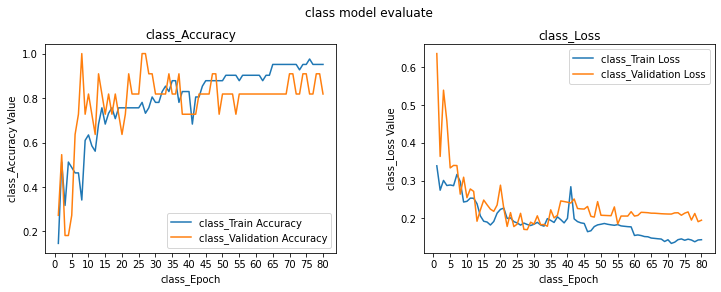

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('class model evaluate', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

class_epoch_list = list(range(1,81))
ax1.plot(class_epoch_list, history.history['accuracy'], label='class_Train Accuracy')
ax1.plot(class_epoch_list, history.history['val_accuracy'], label='class_Validation Accuracy')
ax1.set_xticks(np.arange(0, 81, 5))
ax1.set_ylabel('class_Accuracy Value')
ax1.set_xlabel('class_Epoch')
ax1.set_title('class_Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(class_epoch_list, history.history['loss'], label='class_Train Loss')
ax2.plot(class_epoch_list, history.history['val_loss'], label='class_Validation Loss')
ax2.set_xticks(np.arange(0, 81, 5))
ax2.set_ylabel('class_Loss Value')
ax2.set_xlabel('class_Epoch')
ax2.set_title('class_Loss')
l2 = ax2.legend(loc="best")

In [27]:
#對分類區中的test進行預測
time_pre=timemodel.predict(test_X,verbose=2)

2/2 - 0s


In [28]:
test_y[:3]

array([[1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
time_pre[:3]

array([[0.78882825, 0.23449934],
       [0.4607967 , 0.40208986],
       [0.08275142, 0.01977947]], dtype=float32)

In [30]:
# calculate RMSE
rmse = sqrt(mean_squared_error(test_y, time_pre))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.401


In [31]:
Y_pred = np.argmax(time_pre,axis=1)
Y_test = np.argmax(test_y,axis=1)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[[32  0]
 [ 9 11]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        32
           1       1.00      0.55      0.71        20

    accuracy                           0.83        52
   macro avg       0.89      0.78      0.79        52
weighted avg       0.86      0.83      0.81        52



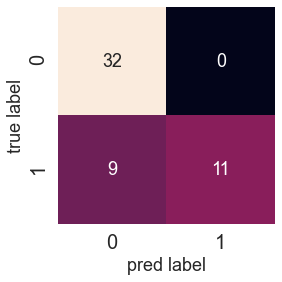

In [33]:
mat = confusion_matrix(Y_test,Y_pred)
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('pred label')
plt.ylabel('true label')

t = ['0','1']
print(mat)
print(classification_report(Y_test,Y_pred,target_names=t))

Text(0.5, 1.0, 'Predicted label (first 100)')

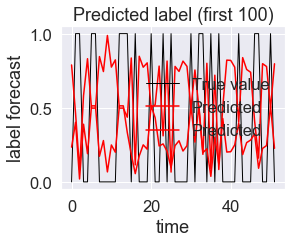

In [34]:
plt.figure(figsize=(4,3))


# plt.subplot(3,1,1)
plt.plot(Y_test[:150], color = 'black', linewidth=1, label = 'True value')
plt.plot(time_pre[:150], color = 'red', label = 'Predicted')
plt.legend(frameon=False)
plt.ylabel("label forecast")
plt.xlabel("time")
plt.title("Predicted label (first 100)")

In [35]:
#timemodel.save('80epo-lstm.h5')